<a href="https://colab.research.google.com/github/ArchitDhodi/Bike-Sharing-Demand-Prediction-Regression/blob/main/Submission_of_Bike_Sharing_Demand_Prediction_Regression_ArchitDhodi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Archit Dhodi**

# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is  the prediction of bike count required at each hour for the stable supply of rental bikes.


# **GitHub Link -**

[Github Link](https://github.com/ArchitDhodi/Bike-Sharing-Demand-Prediction-Regression)

---



[Video Presentation Link](https://youtu.be/5b0JqdO-82g)

# **We have been given a dataset containing data on various factors that impact the usage of bike rental services. The main objective of this project is to understand the underlying trends and make prediction about the demand for bike rentals at different times. Our aim is also to identify the key factors that influence bike rental demand.**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import time

### Dataset Loading

In [ ]:
# Load Dataset
!gdown https://drive.google.com/uc?id=1kq8heVaZAGVjK-2iCoUtlq9NamhGrFFz


Downloading...
From: https://drive.google.com/uc?id=1kq8heVaZAGVjK-2iCoUtlq9NamhGrFFz
To: /content/SeoulBikeData.csv
100% 604k/604k [00:00<00:00, 70.0MB/s]


In [ ]:
dataset = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin')

### Dataset First View

In [ ]:
# Dataset First Look
dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
lr= len(dataset.index)
lc= len(dataset.columns)
print("The number of rows is :-",lr)
print("The number of columns is :-",lc)

The number of rows is :- 8760
The number of columns is :- 14


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.drop_duplicates(inplace=True)
dataset.reset_index()

index        Date  Rented Bike Count  Hour  Temperature(°C)  \
0         0  01/12/2017                254     0             -5.2   
1         1  01/12/2017                204     1             -5.5   
2         2  01/12/2017                173     2             -6.0   
3         3  01/12/2017                107     3             -6.2   
4         4  01/12/2017                 78     4             -6.0   
...     ...         ...                ...   ...              ...   
8755   8755  30/11/2018               1003    19              4.2   
8756   8756  30/11/2018                764    20              3.4   
8757   8757  30/11/2018                694    21              2.6   
8758   8758  30/11/2018                712    22              2.1   
8759   8759  30/11/2018                584    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm) Seasons     Holiday Functioning Day  
0               0.0  Winter  No Holiday             Yes  
1               0.0  Winter  No Holiday             Yes  
2               0.0  Winter  No Holiday             Yes  
3               0.0  Winter  No Holiday             Yes  
4               0.0  Winter  No Holiday             Yes  
...             ...     ...         ...             ...  
8755            0.0  Autumn  No Holiday             Yes  
8756            0.0  Autumn  No Holiday             Yes  
8757            0.0  Autumn  No Holiday             Yes  
8758            0.0  Autumn  No Holiday             Yes  
8759            0.0  Autumn  No Holiday             Yes  

[8760 rows x 15 columns]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
miss_values =  dataset.isnull().sum().sort_values(ascending=False)
miss_values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

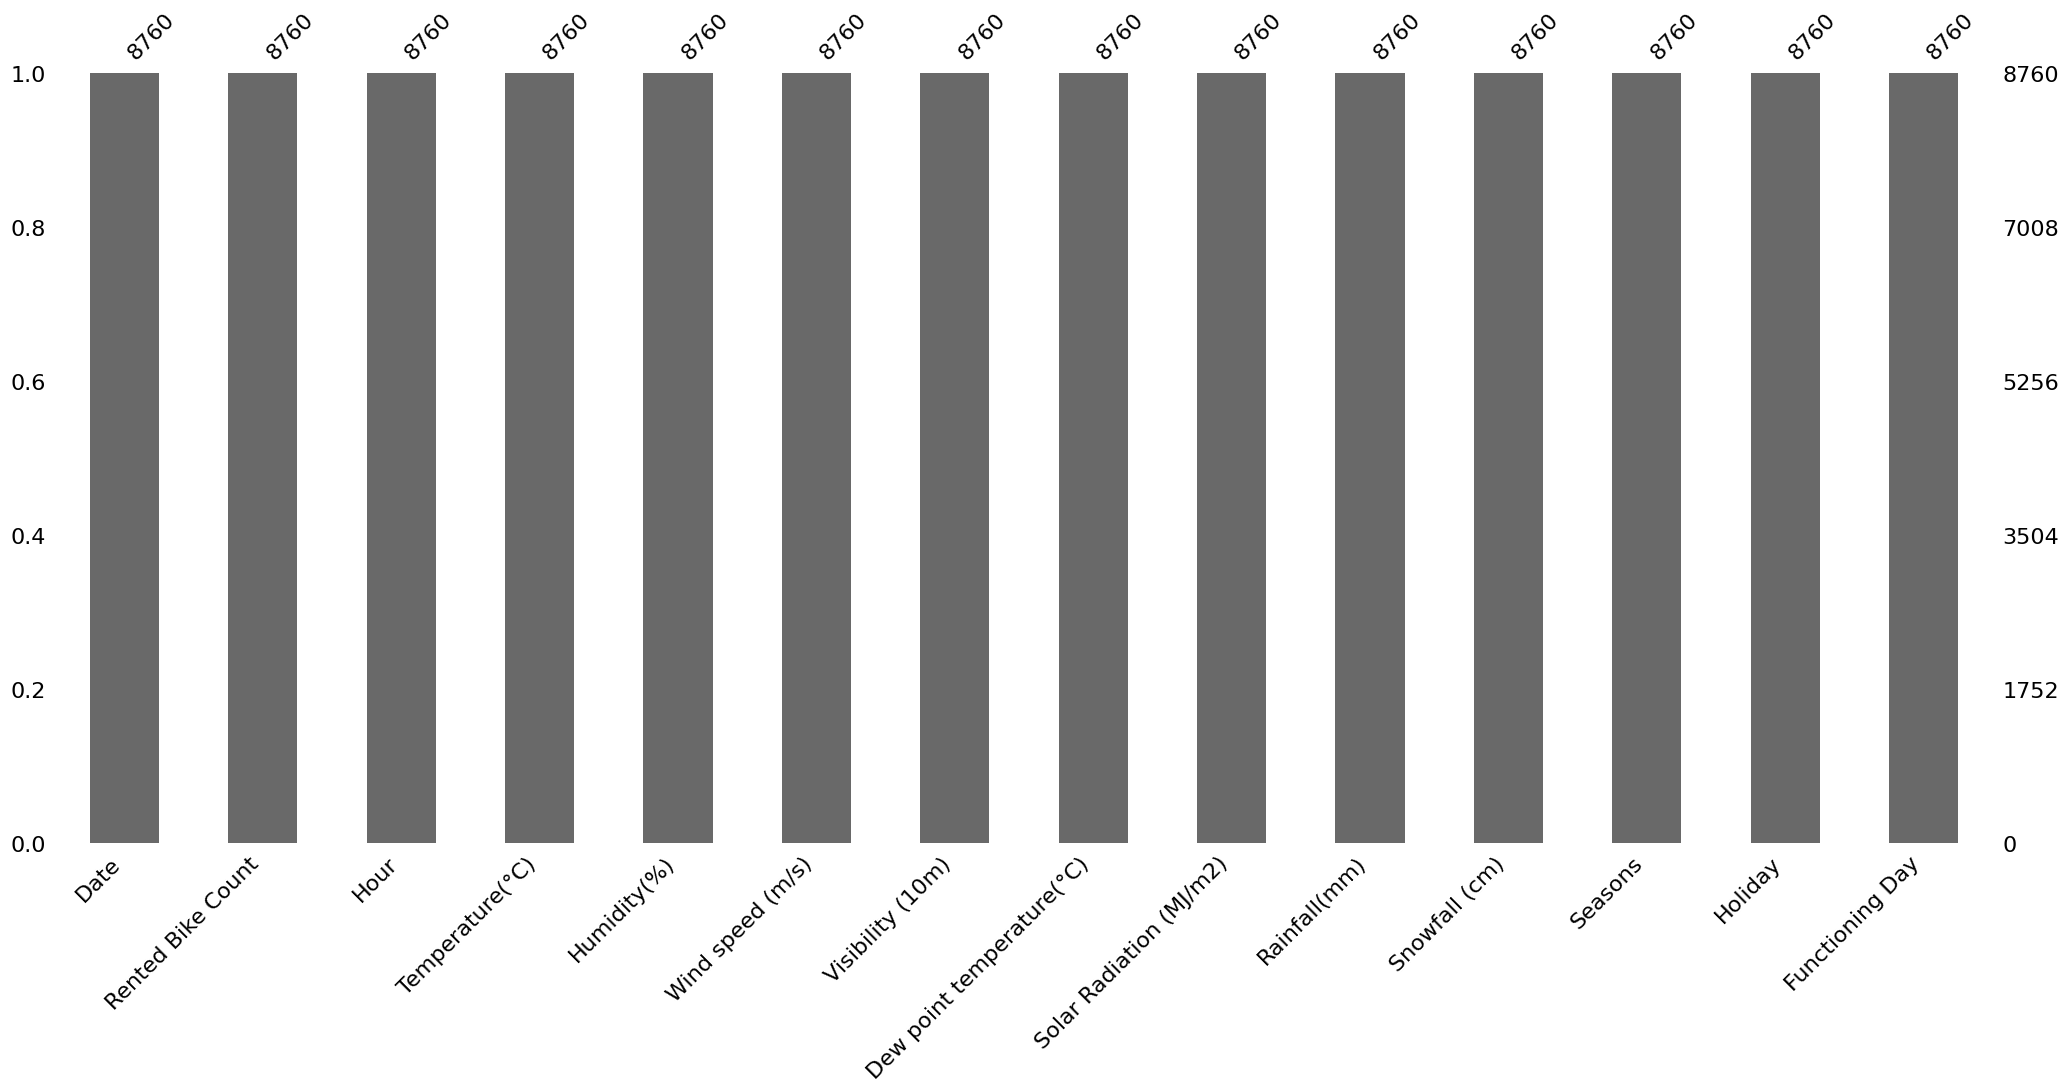

In [ ]:
# Visualizing the missing values
msno.bar(dataset)

### What did you know about your dataset?

From the above analysis, we found that our dataset has 15 columns and 8760 rows (which represents number of hours in a calendar year(365 days)). We don't have duplicate or null values in our dataset. The variables in our dataset are mostly of integer or float datatype. The date column has object datatype. For calculations, we need to convert into datetime format.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description



*   Date :- Date

*   Rented Bike Count :- Number of bikes rented per hour

*   Hour :- Hour of the day (0-23)

*   Temperature :- Temperature of the day (in degrees Celsius)

*   Humidity :- Measure of humidity in percentage

*   Windspeed :- Speed of the wind in m/s

*   Visibility :- Measure of visibility in metres

*   Dew Point Temperature :- Dew Point Temperature measure

*   Solar Radiation :- Solar Radiation Measure

*   Rainfall :- Rainfall in mm

*   Snowfall :- Measure of snowfall in cm

*   Seasons :- 1=Spring, 2=Summer, 3=Fall, 4=Winter

*   Holiday :- Whether a holiday or not

*   Functional Day :- Whether a functional day or not


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(dataset.apply(lambda col: col.unique()))

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

In [ ]:
# Check Number of Unique Values for each variable
print(dataset.apply(lambda col: col.nunique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# First rename all the columns in our dataframe to a simple one
dataset= dataset.rename(columns= {"Date":"date",
                                  'Rented Bike Count':'bike_count',
                                  "Temperature(°C)":"temperature",
                                  "Humidity(%)":"humidity",
                                  "Wind speed (m/s)":"wind_speed",
                                  "Visibility (10m)":"visibility",
                                  "Dew point temperature(°C)":"dew_point_temperature",
                                  "Solar Radiation (MJ/m2)":"solar_radiation",
                                  "Rainfall(mm)":"rainfall",
                                  "Snowfall (cm)":"snowfall",
                                  "Seasons":"seasons",
                                  "Holiday":"holiday",
                                  "Functioning Day":"functioning_day"})


In [ ]:
# To check
dataset.columns

Index(['date', 'bike_count', 'Hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day'],
      dtype='object')

In [ ]:
dataset['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8760 entries, 0 to 8759
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
8760 non-null   object
dtypes: object(1)
memory usage: 136.9+ KB


In [ ]:
#  Converting the datatype of date variable from object to datetime and extracting year, month and day
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['month'] = pd.DatetimeIndex(dataset['date']).month
dataset['day'] = pd.DatetimeIndex(dataset['date']).day_of_week
dataset['day']
# Here Monday=0,Tuesday=1.....Sunday=6

0       3
1       3
2       3
3       3
4       3
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: day, Length: 8760, dtype: int64

In [ ]:
# we will create a new column that replaces values of weekend as 1 and weekdays as 0
dataset['week_ends_or_days']= dataset['day'].apply(lambda x: 1 if x==5 or x==6 else 0)
dataset['week_ends_or_days'].head()

0    0
1    0
2    0
3    0
4    0
Name: week_ends_or_days, dtype: int64

In [ ]:
dataset.head()

date  bike_count  Hour  temperature  humidity  wind_speed  visibility  \
0 2017-01-12         254     0         -5.2        37         2.2        2000   
1 2017-01-12         204     1         -5.5        38         0.8        2000   
2 2017-01-12         173     2         -6.0        39         1.0        2000   
3 2017-01-12         107     3         -6.2        40         0.9        2000   
4 2017-01-12          78     4         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      holiday functioning_day  month  day  week_ends_or_days  
0  No Holiday             Yes      1    3                  0  
1  No Holiday             Yes      1    3                  0  
2  No Holiday             Yes      1    3                  0  
3  No Holiday             Yes      1    3                  0  
4  No Holiday             Yes      1    3                  0

### We renamed the columns in our dataset to a simpler one. We converted the date column to datetime datatype .We created a new column week_ends_or_days where 0 denotes a weekday and 1 denotes a weekend

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Creating a function to print bar chart for the entered columns as inputs
def plot_bar_chart(df, x, y, t1):
  fig, ax = plt.subplots(figsize=(18,6))
  sns.barplot(data=df, x=x, y=y, ax=ax)
  plt.title(t1)
  #plt.xticks(dataset[x])
  plt.xlabel(x)
  plt.ylabel(y)


#### Chart - 1

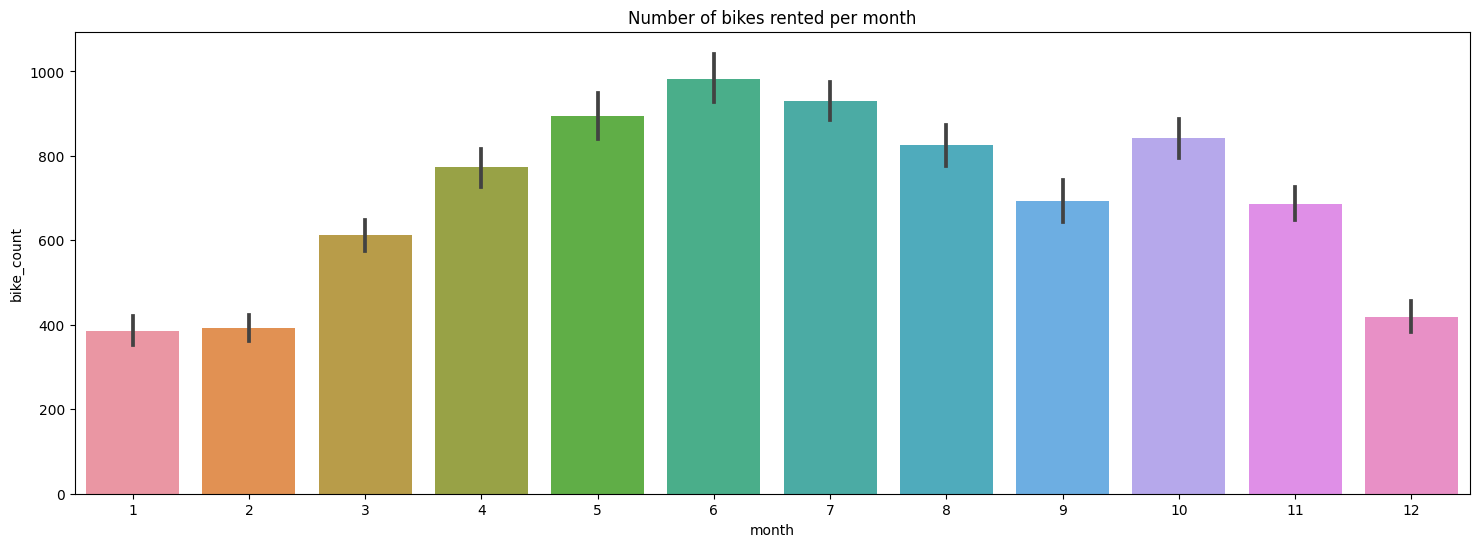

In [ ]:
# Bar chart for the number of bikes rented per month
plot_bar_chart(dataset,'month','bike_count','Number of bikes rented per month')

##### 1. Why did you pick the specific chart?

We used the bar chart becuase bar chart is used when we need to compare data values (numeric) of related categories

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can see that the number of bikes rented are maximum during the summer months and was minimum was during the winter months. During the spring and autumn(fall) seaons, the demand for rental bikes was relatively greater than the demand during winter seasons

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from the above graph, the maximum number of bikes were rented during the spring, summer and autumn(fall) seasons. So, we recommend the operators to give more bikes for rent during these months, which might increase their revenue and inturn bring more bikes for rent during this period. During the months of winters, the operators can ensure their bikes get proper service and maintainance which help in improved customer experience.

#### Chart - 2

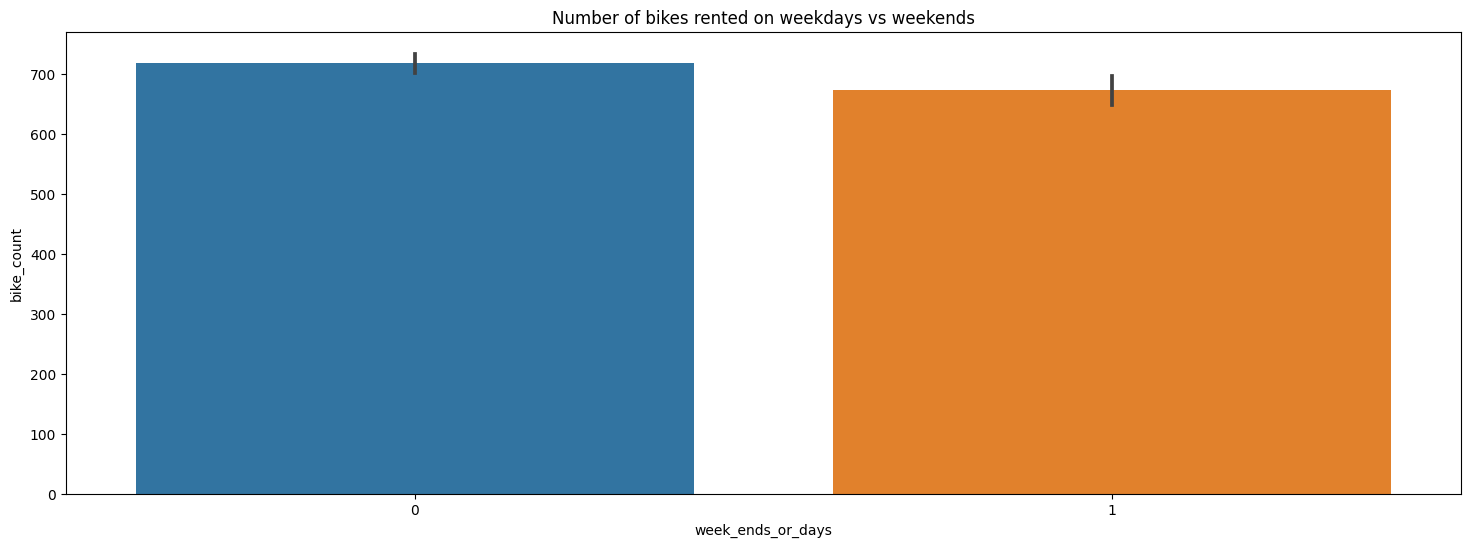

In [ ]:
# Graph for number of bikes rented on weekdays vs weekends
plot_bar_chart(dataset,"week_ends_or_days","bike_count","Number of bikes rented on weekdays vs weekends")

##### 1. Why did you pick the specific chart?

We picked the bar chart because bar chart is used to compare data values (numeric) of related categories.

##### 2. What is/are the insight(s) found from the chart?

From the given graph, we can see that the demand for bikes rented is greater during weekdays than during weekends. But said that, we cannot consider the fact that during weekends too, the demand is not considerably lower

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight we got through this graph is that the dedmand for rental bikes remains high irrespective of the fact whether it's a weekday or a weekend.

#### Chart - 3

[Text(0.5, 1.0, ' Number of bikes rented per hour during weekdays and weekends')]

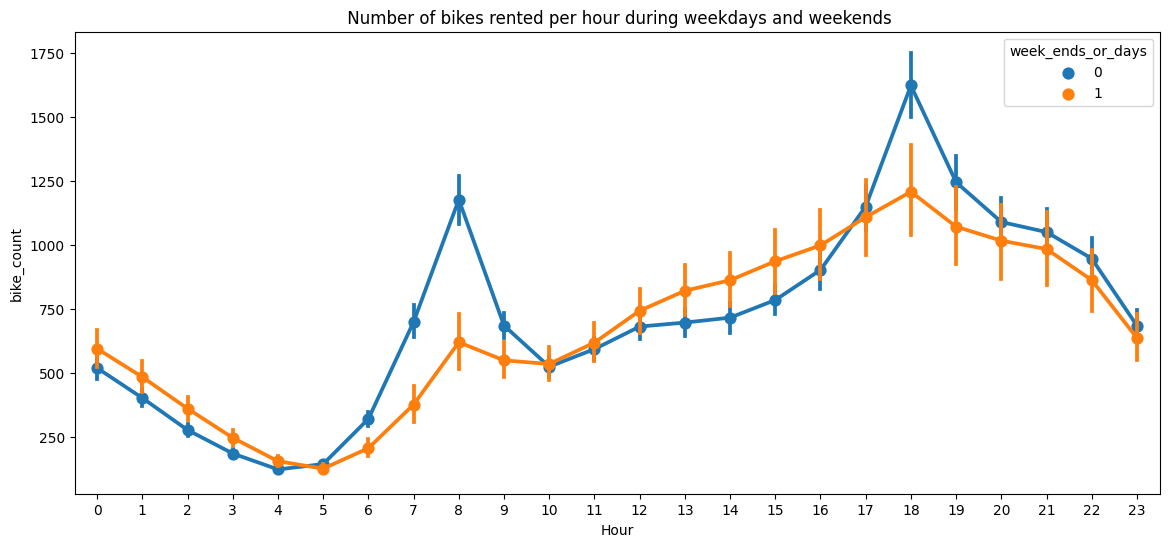

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(dataset, x='Hour', y='bike_count',hue="week_ends_or_days",ax=ax)
ax.set(title=" Number of bikes rented per hour during weekdays and weekends")

##### 1. Why did you pick the specific chart?

We used pointplot here because it shows point estimates and confidence intervals using scatterplot glyphs.

##### 2. What is/are the insight(s) found from the chart?

The bar chart plotted before did not give us much detailed insights except that the demand remains high throughout the week. Here, we can clearly see that during wweekdays, there are two big spikes at 8am and 6pm indicating that a large number of people commute to their office and back to their place of accomodation on rented bikess, during weekdays. While on weekends, the data indicates that demand remains marginally higher in the early hours(till dawn) of the day, and gradually increases with a small spike at 8 am, indicating there might be some officegoers too, and the increases till 6 pm after which it gradually declines

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can suggest the advice the operators to make sure that during these peak times, make the number of renntal bikes as high as possible. We can advise the operators to start pre-booking of rental bikes, this will reduce commotion, enhance user experience and ensure maximum capacity utilization of the rental bikes. Introduce membership programs, where people can apply for monthly pass, which will give them access to rental bikes at a lesser price during off-peak hours. The store can also introduce return trips discounts, which will attract more customers.

#### Chart - 4

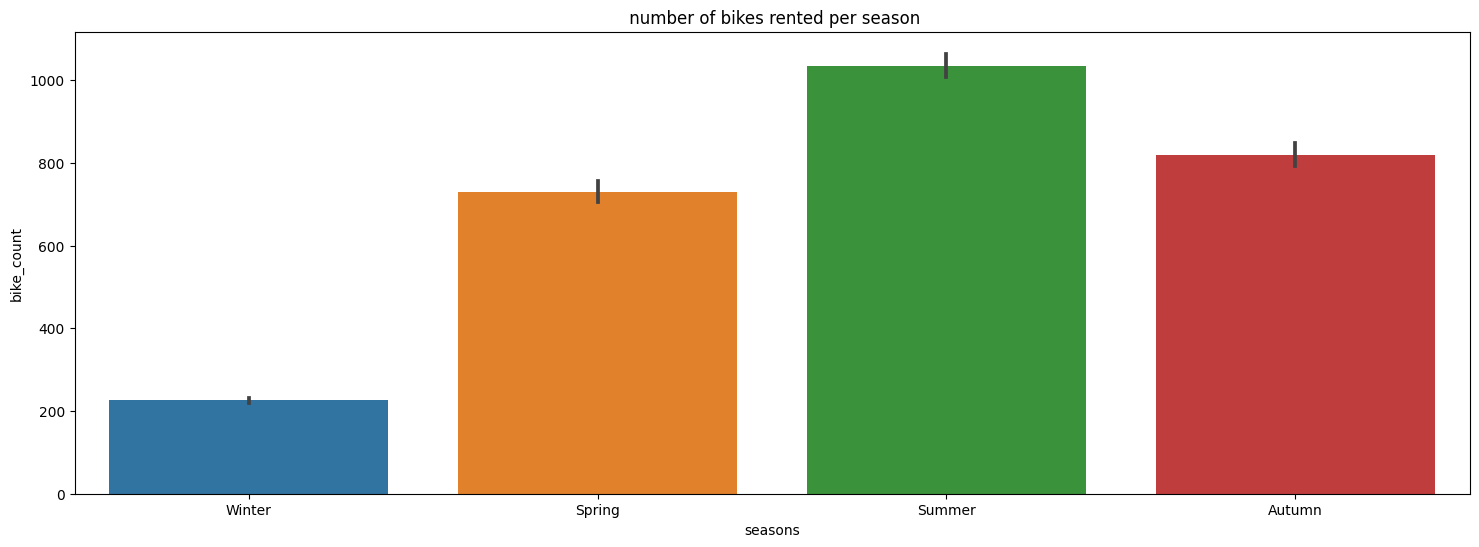

In [ ]:
# Chart - 4 visualization code
plot_bar_chart(dataset,"seasons","bike_count"," number of bikes rented per season")

##### 1. Why did you pick the specific chart?

We picked the bar chart because bar chart is used to compare data values (numeric) of related categories.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can clearly see that the maximum number of bikes were rented during the summer months, followed by autumn and spring months. The minimum number of bikes were rented during the winter season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we found that the maximum number of bikes were rented out in the warmer months of Summer, Autumn and Spring and the number of bikes rented out in the winter months were very less as compared to the numbers rented in other seasons. We advice the operators that they increase the number of bikes available for rent during the warm months which inturn can help increase revenue.The operators can give majority of their bikes for service during the winter months, so that when the demand gets high, the quality of the bikes will be good which inturn will help in positive feedback from customers and even increase the number of returning customers. During the winter months, the operators can lower the prices, so as to not decrease their revenue and the demand increases as compared to earlier years.

#### Chart - 5

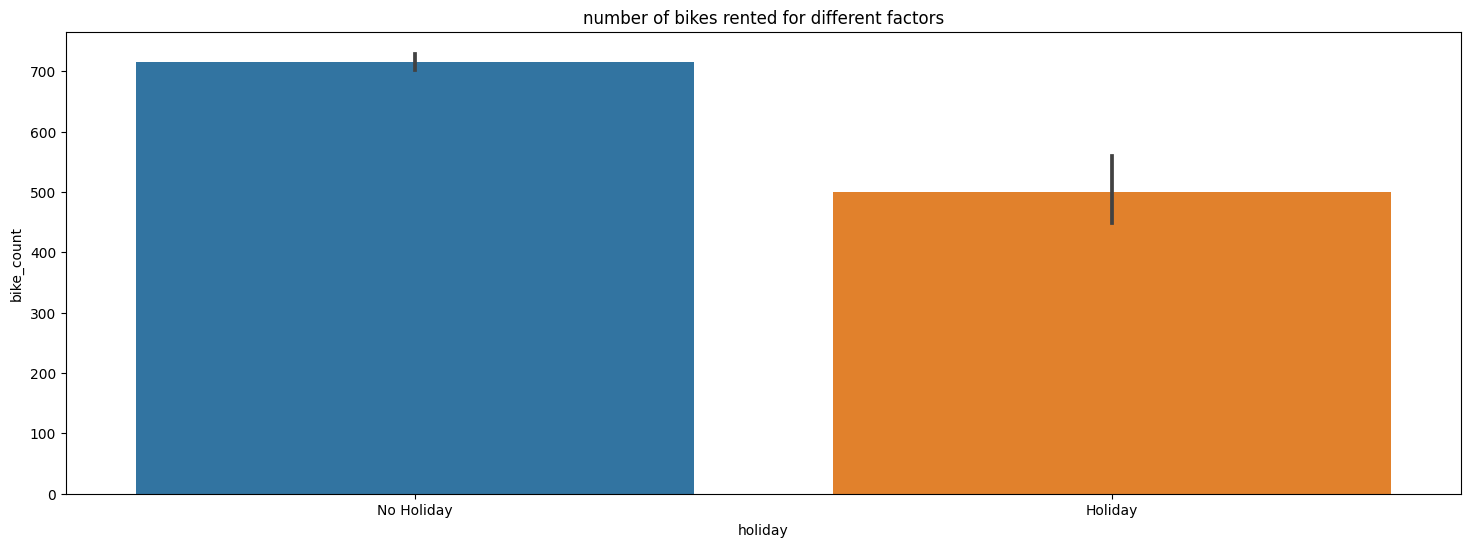

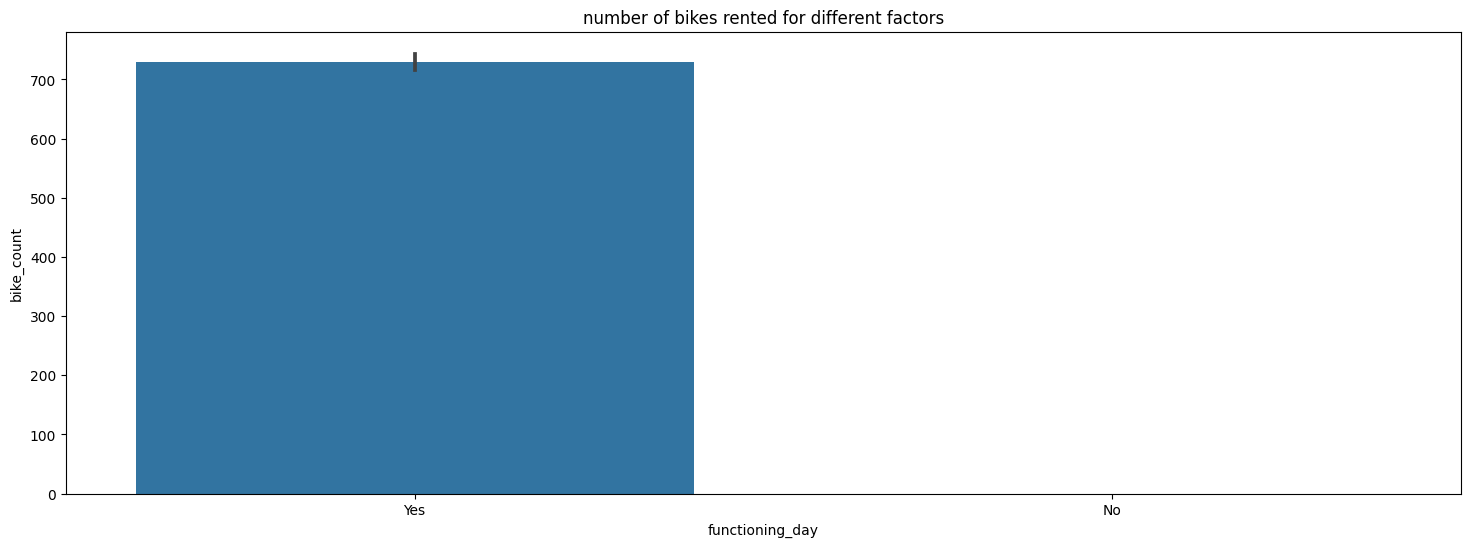

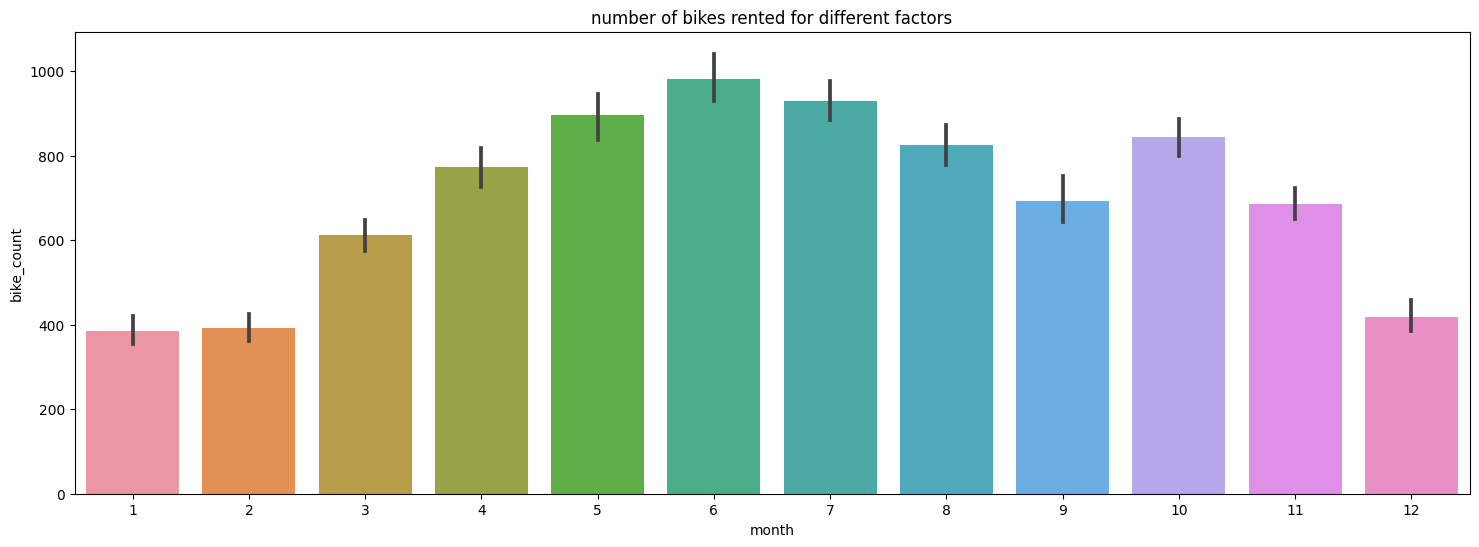

In [ ]:
cat_cols=dataset.select_dtypes(exclude='number')
num_cols=dataset.select_dtypes(include='number')
cat_cols
num_cols
a=['holiday', 'functioning_day', 'month']
for i in a:
  plot_bar_chart(dataset, i, 'bike_count', 'number of bikes rented for different factors')

##### 1. Why did you pick the specific chart?

We picked the bar chart because bar chart is used to compare data values (numeric) of related categories.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can conclude that:-

*   Higher number of bikes were rented on days that were non-holidays as compared to days that were. On non-holidays, an average of 715 bikes were being rented out per day while on holidays, an average of 500 bikes were being rented each day.

*   Almost an average of 700 bikes were rented out each day when it was a functioning day.

*   The maximum number of bikes were rented in spring and summer seasons, followed by autumn season and the minimum  number of bikes were rented in the winter months.

#### Chart - 6

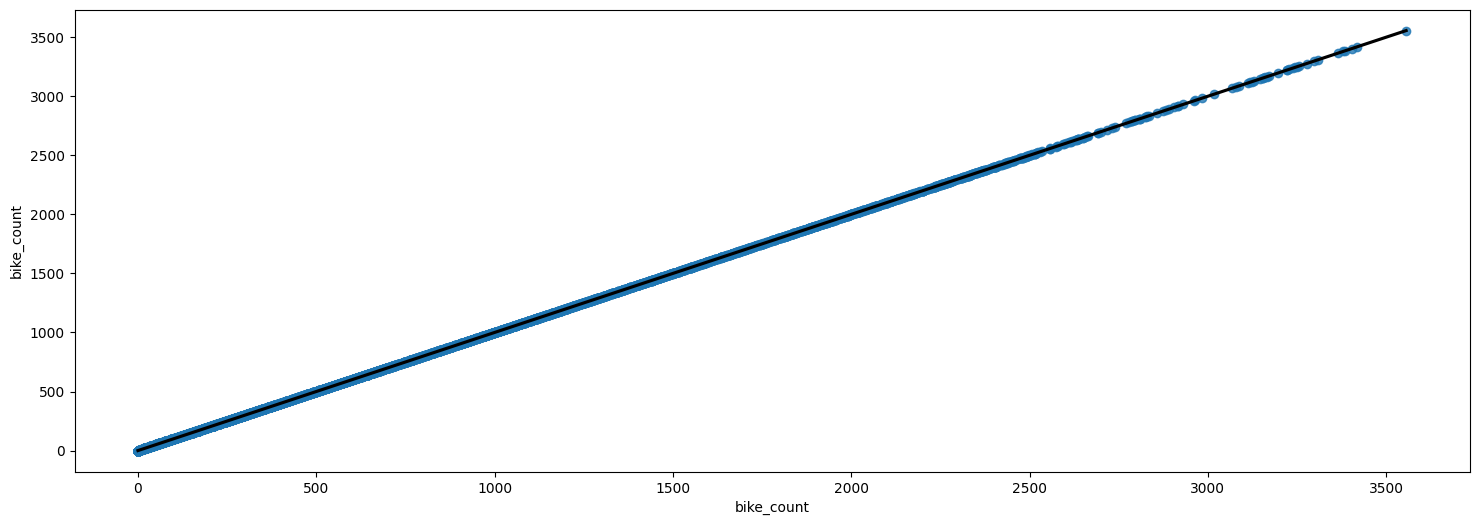

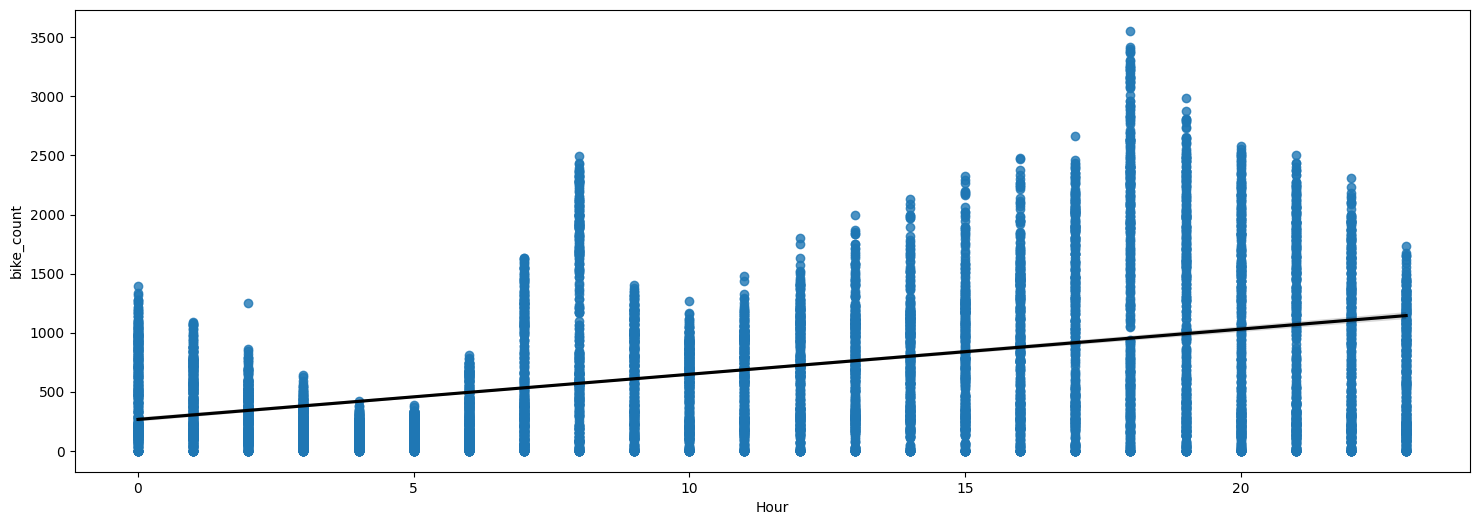

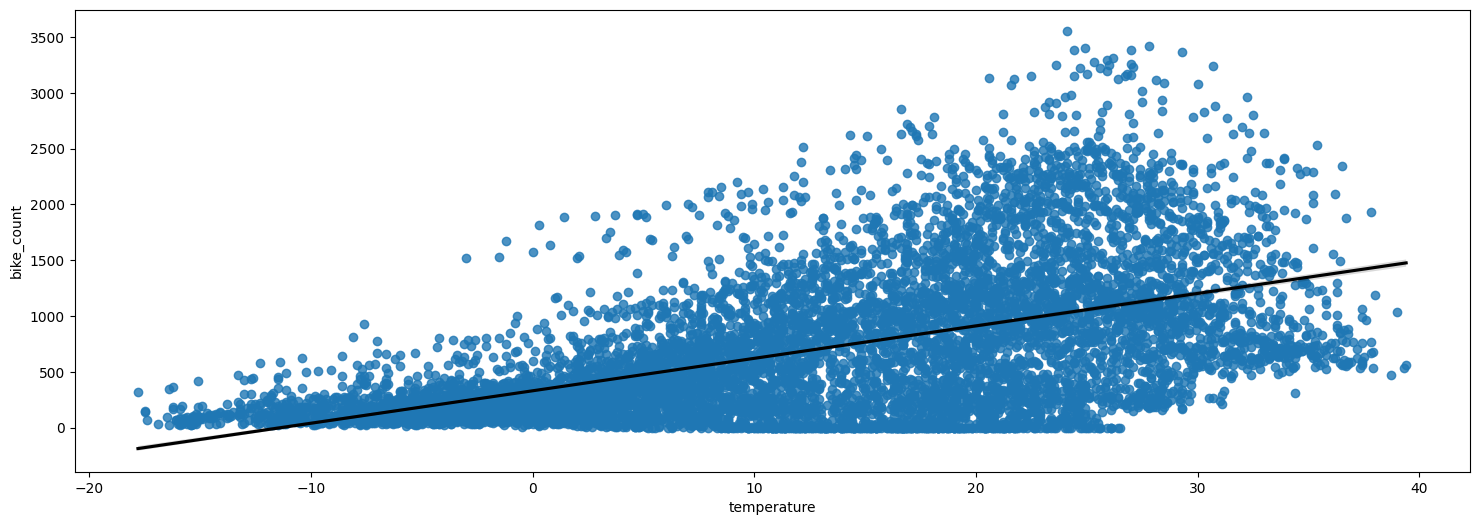

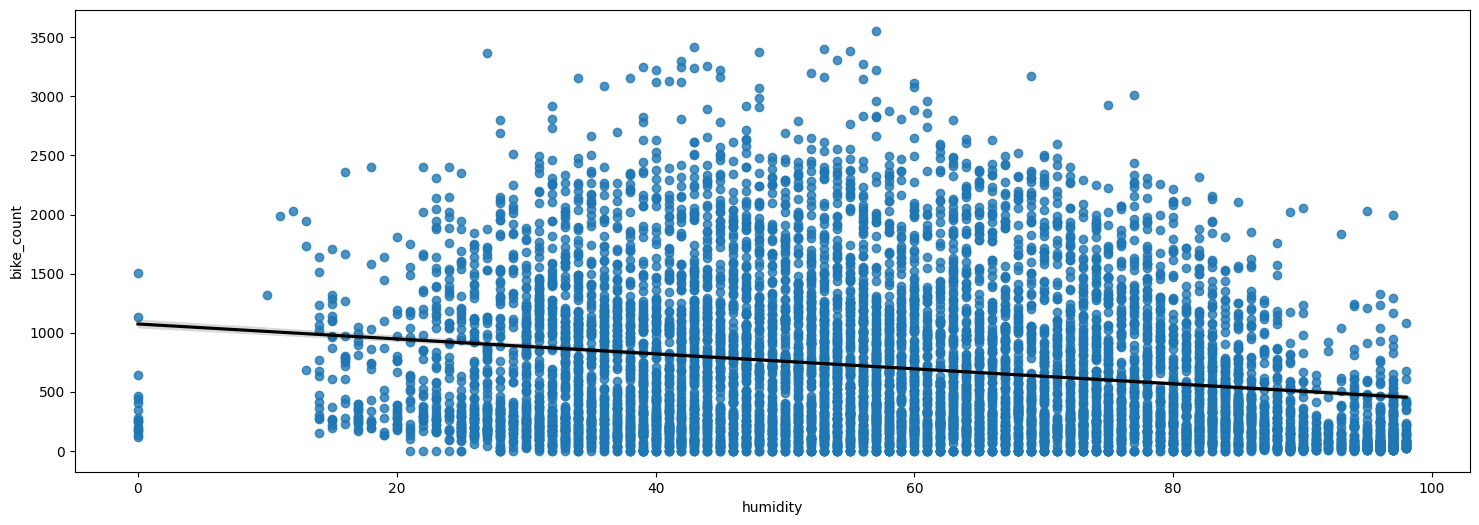

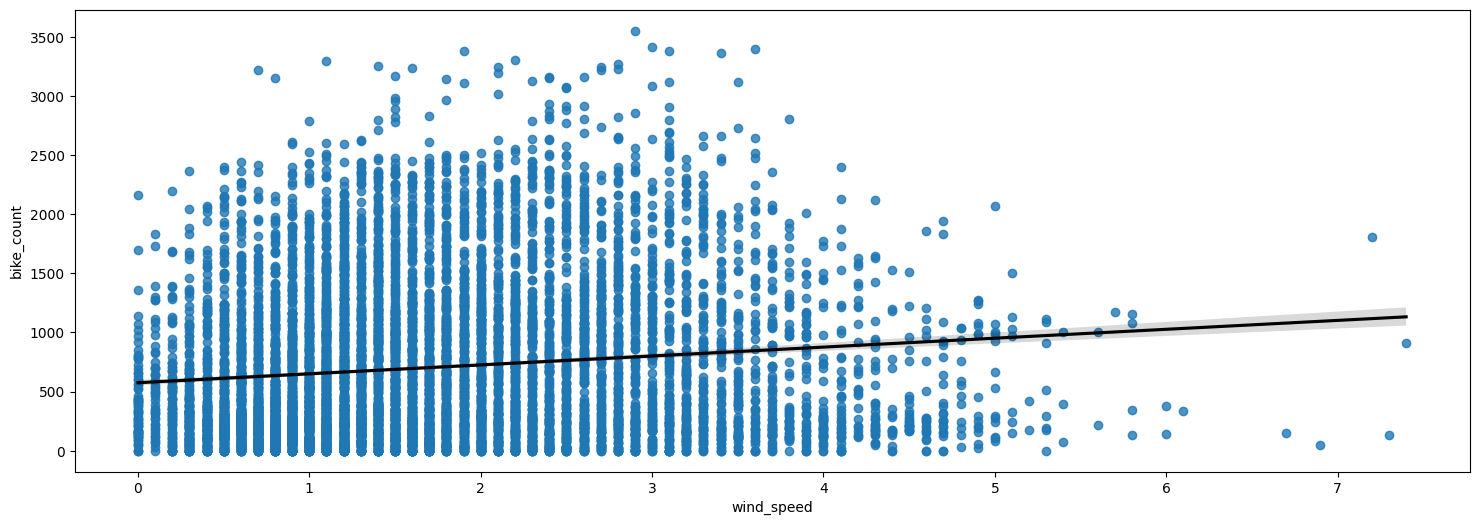

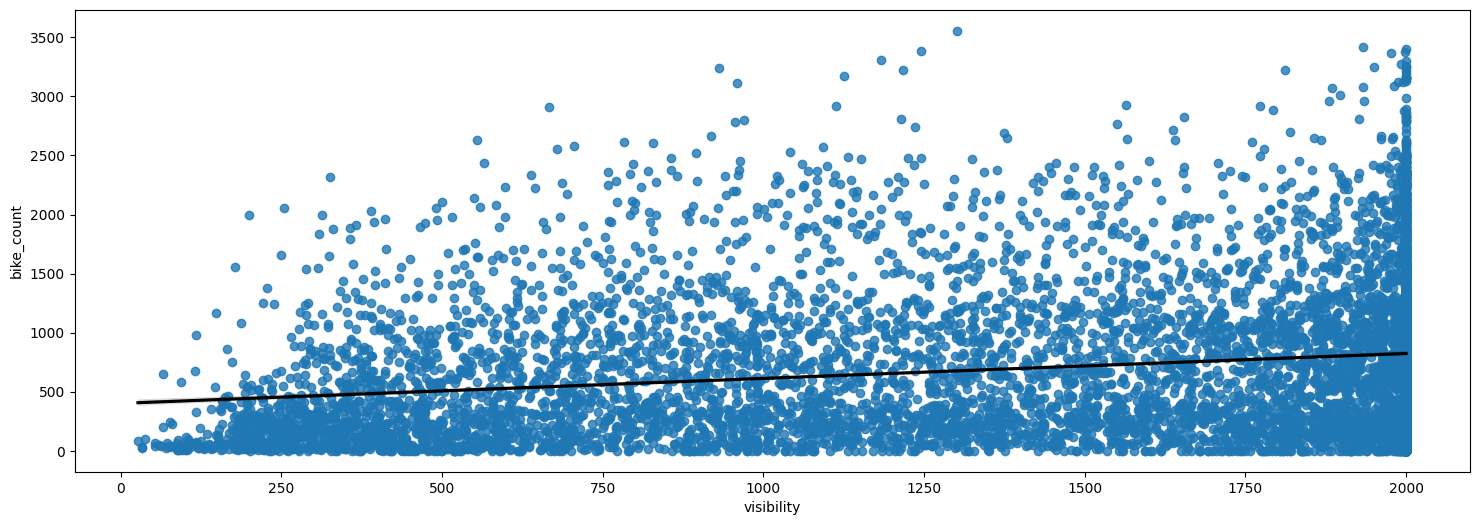

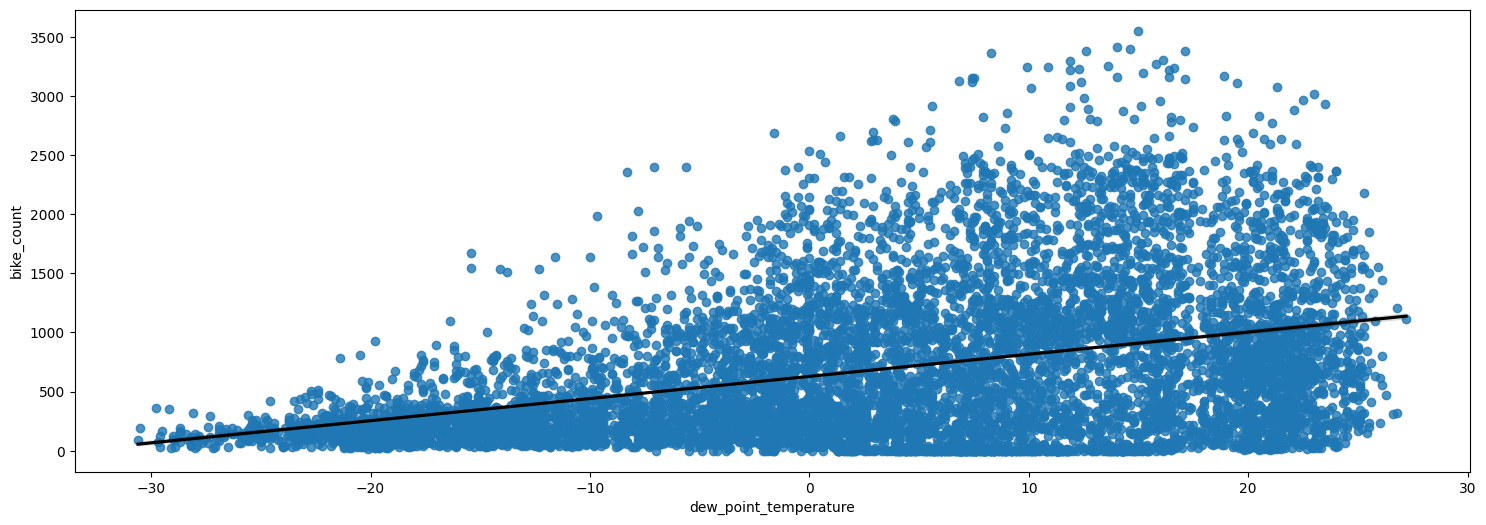

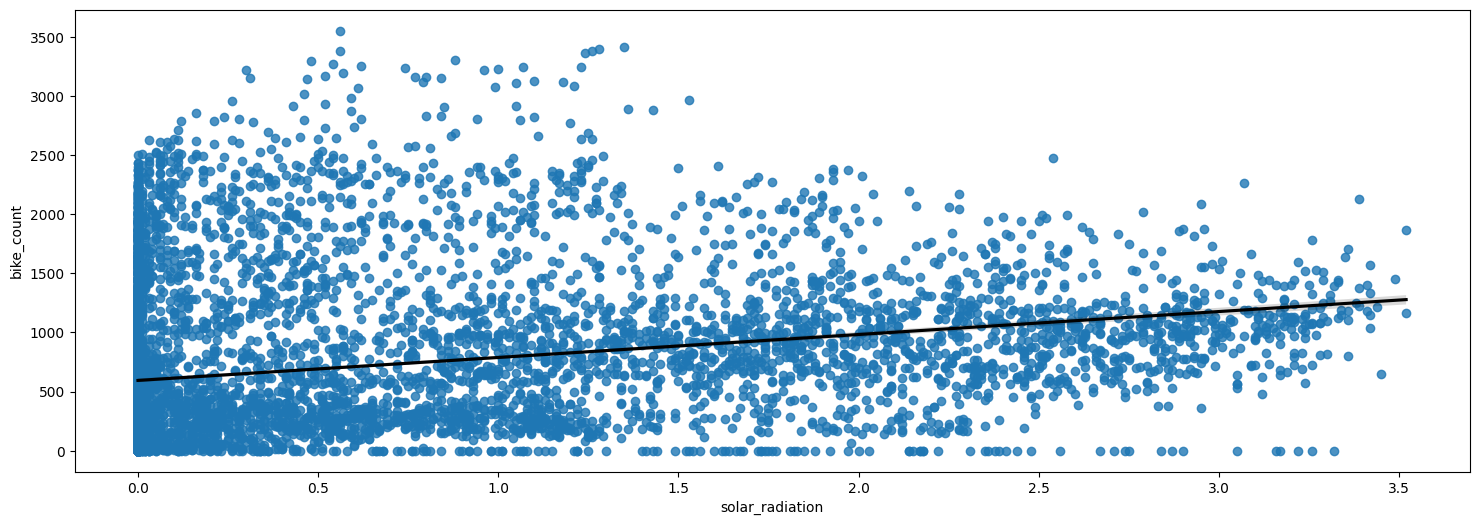

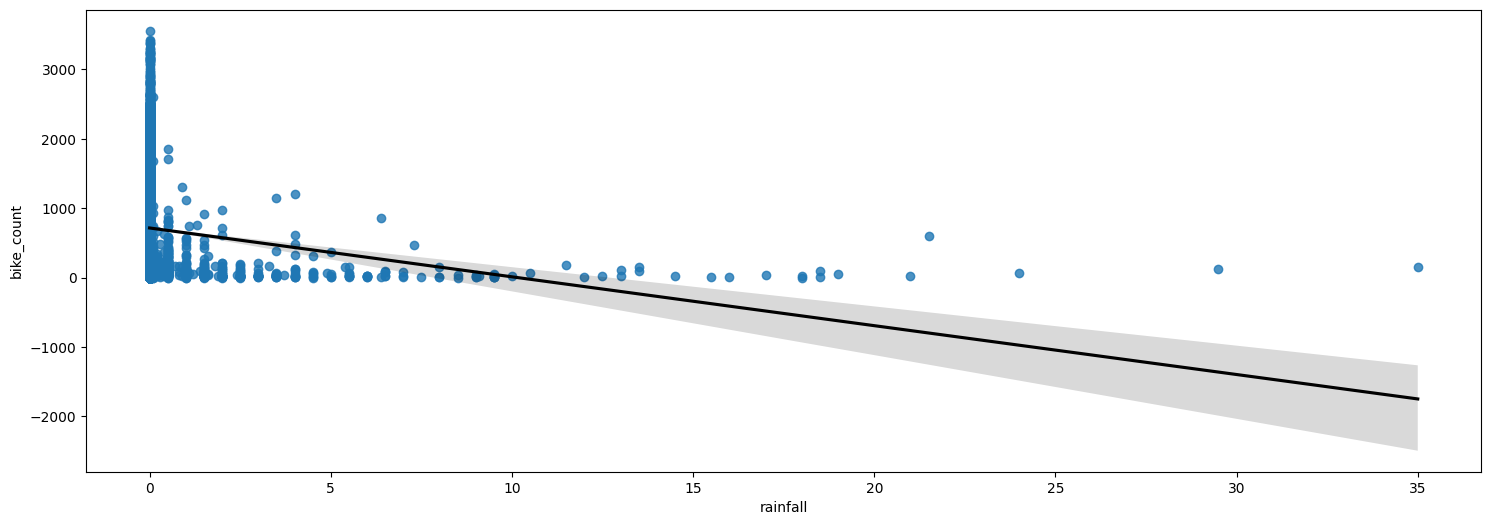

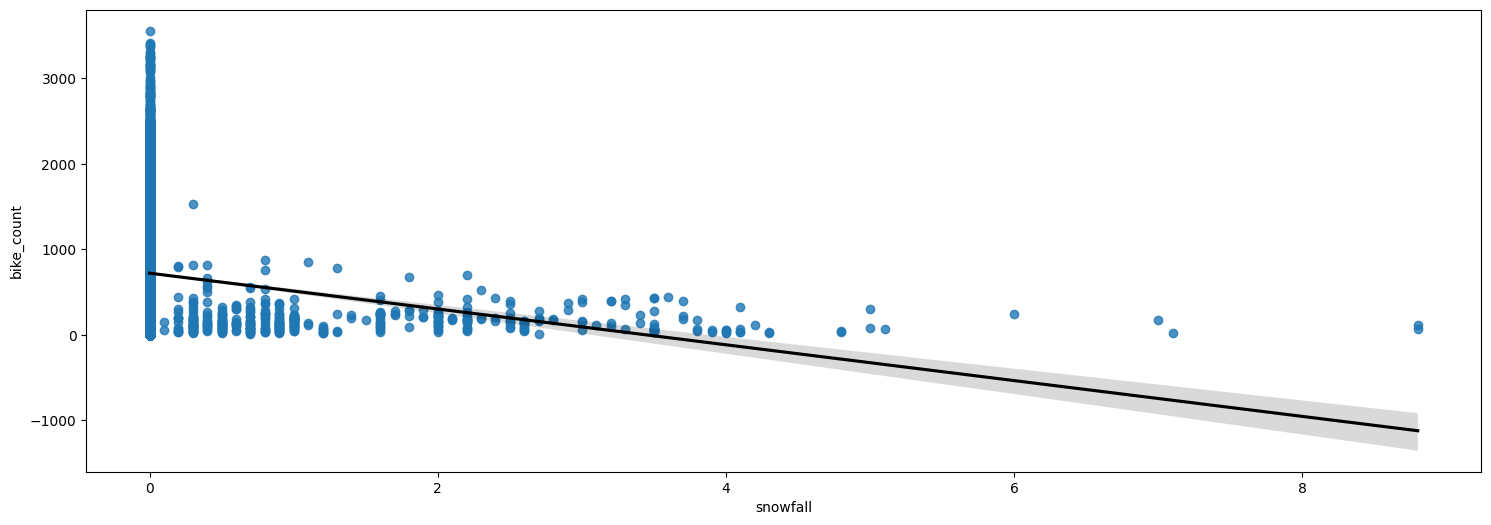

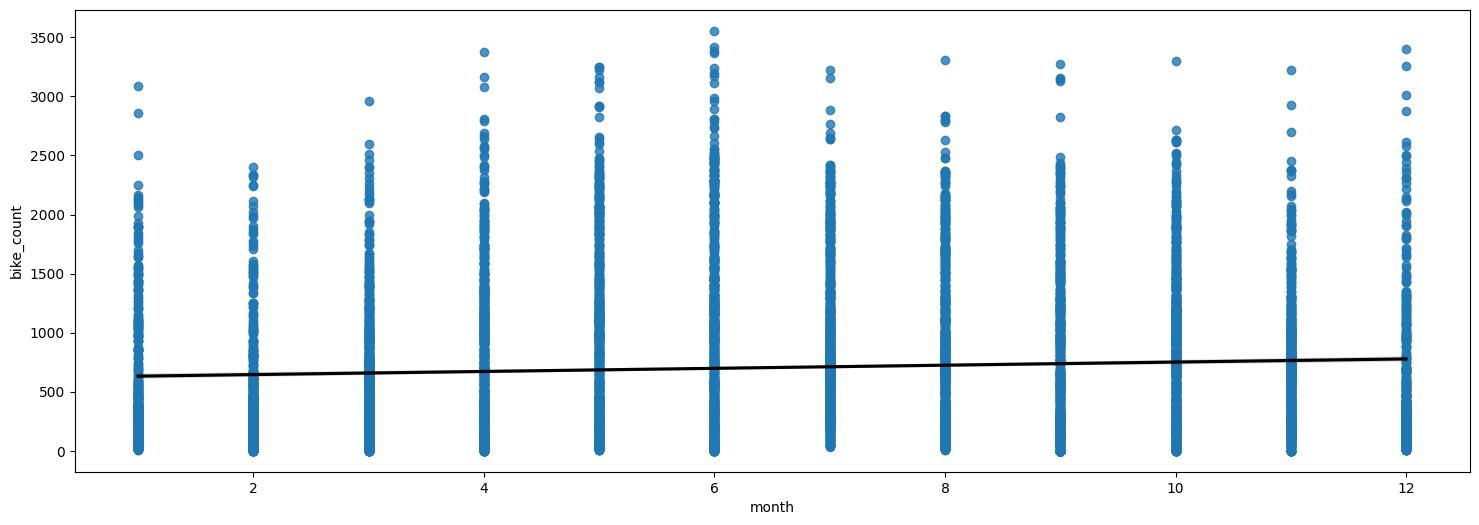

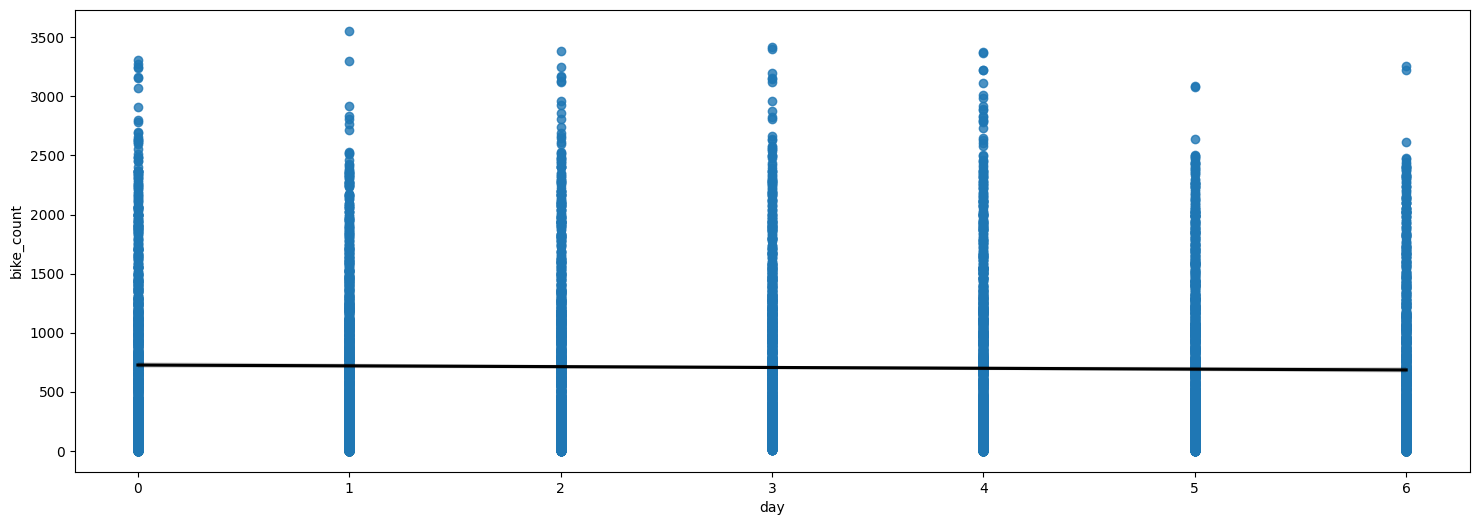

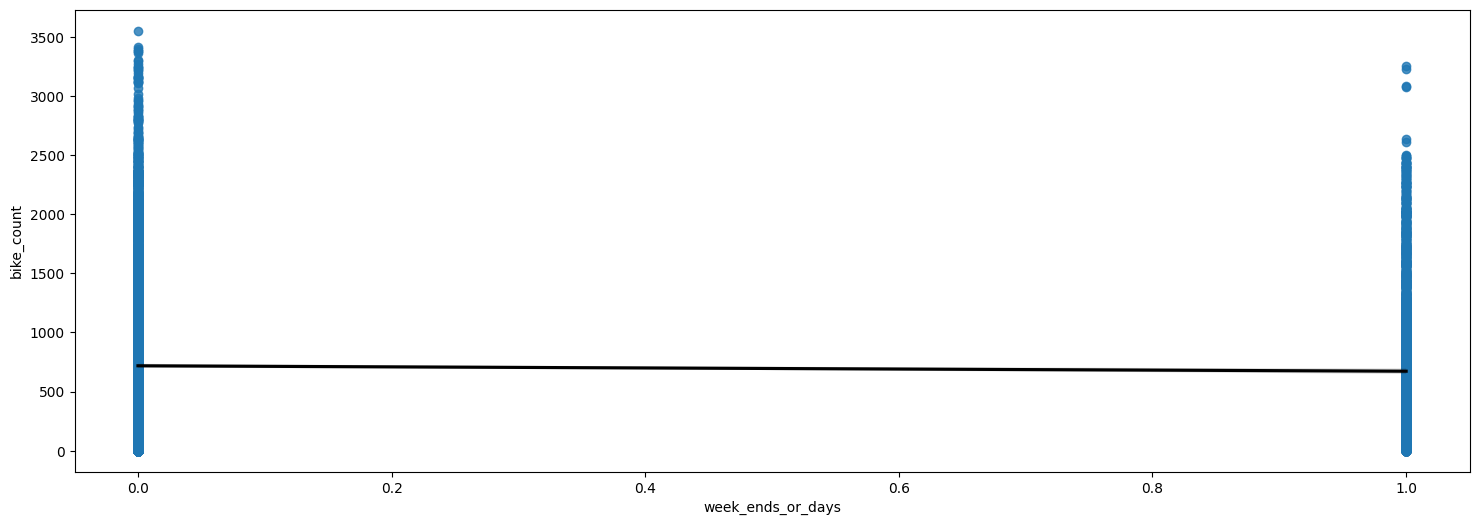

In [ ]:
# Chart - 6 visualization code
for i in num_cols:
  fig,ax = plt.subplots(figsize=(18,6))
  sns.regplot(x=dataset[i], y=dataset['bike_count'], line_kws={'color':"black"})

##### 1. Why did you pick the specific chart?

Regplot is used to plot data and fits a linear regression model.

#### Chart - 7

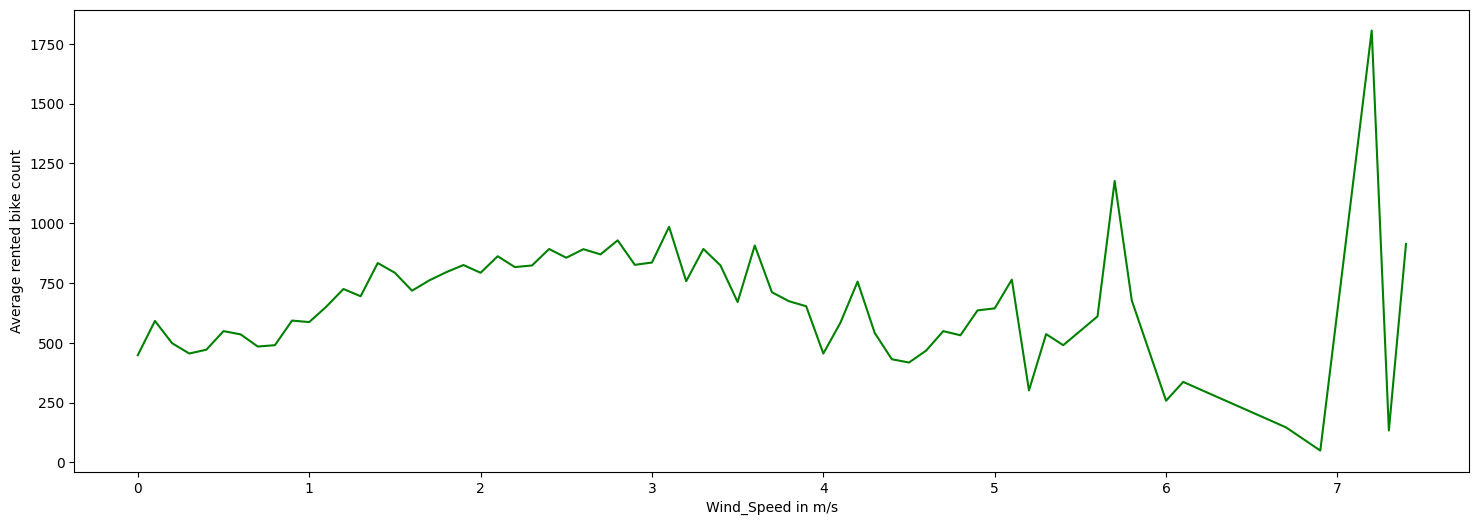

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(18,6))
dataset.groupby('wind_speed').mean()['bike_count'].plot(c='g')
plt.xlabel('Wind_Speed in m/s')
plt.ylabel('Average rented bike count')
plt.show()


##### 1. Why did you pick the specific chart?

We used this particular chart because we wanted to have a look at the average number of bikes rented for different wind speeds.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we can easily conclude that during windy or cloudy weather, the number of bikes rented increases and is the maximum during this time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A short insight here, people like gooing out when the weather is breezy and hence, the spike in number of bikes rented

#### Chart - 8

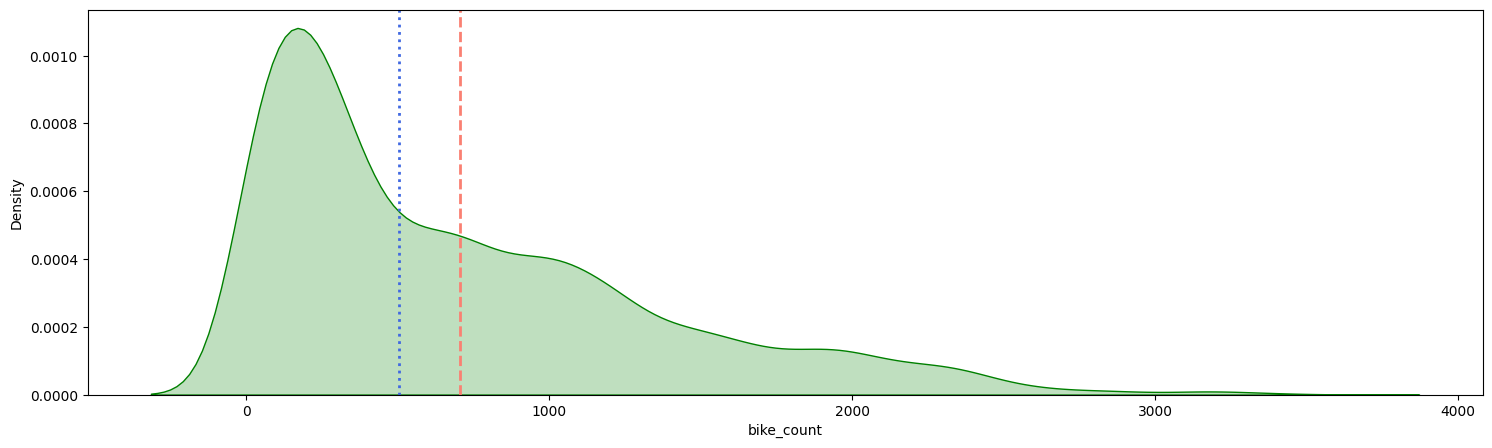

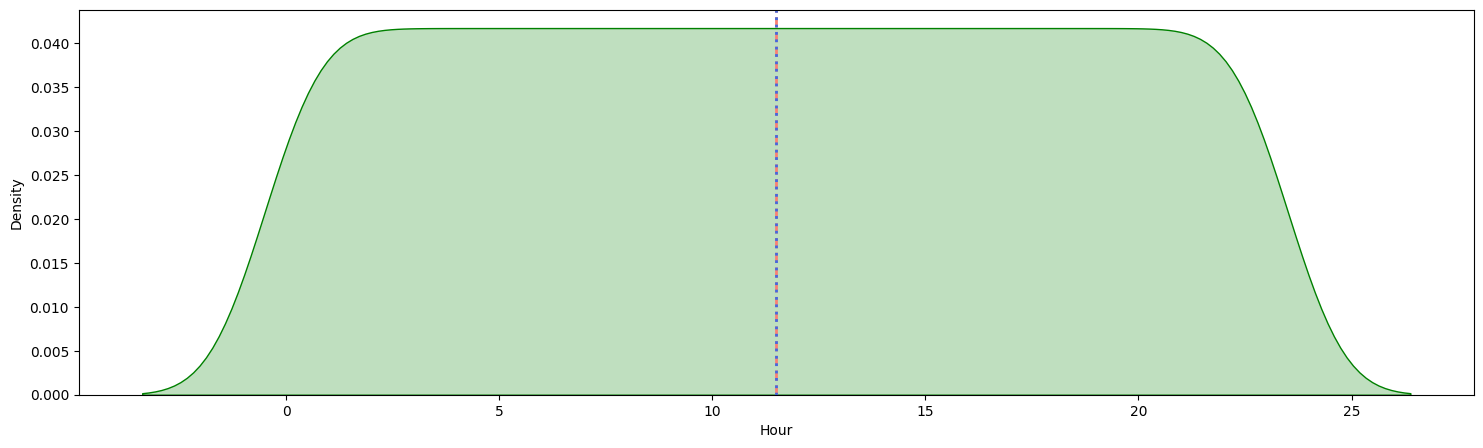

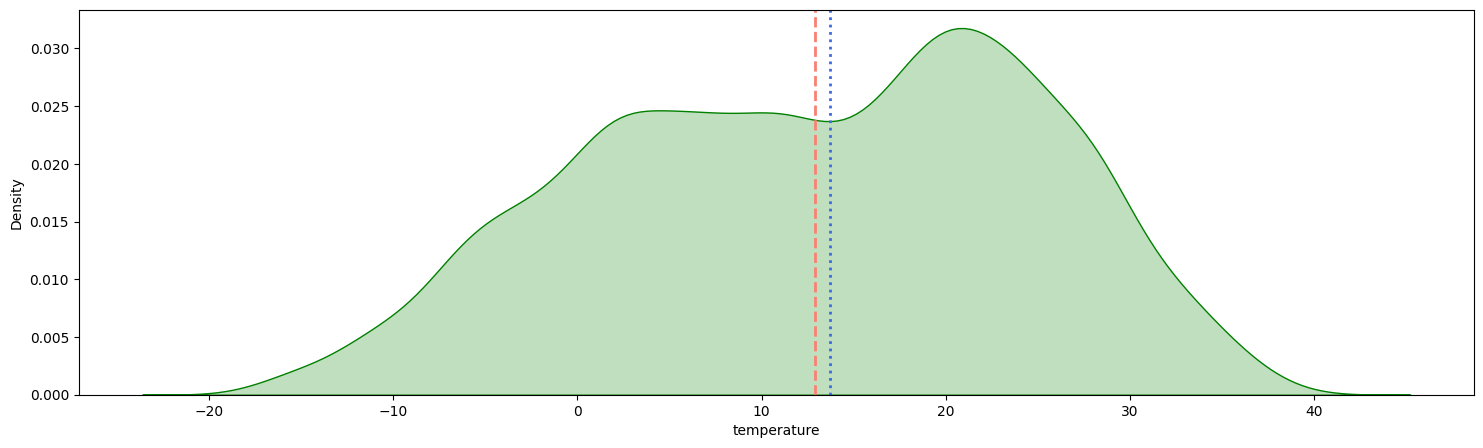

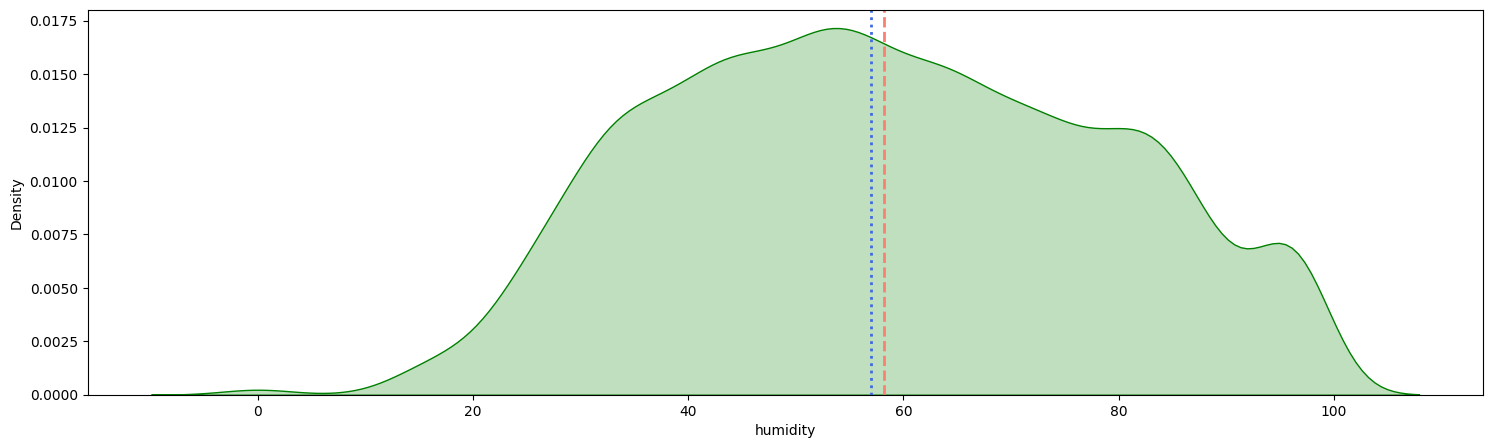

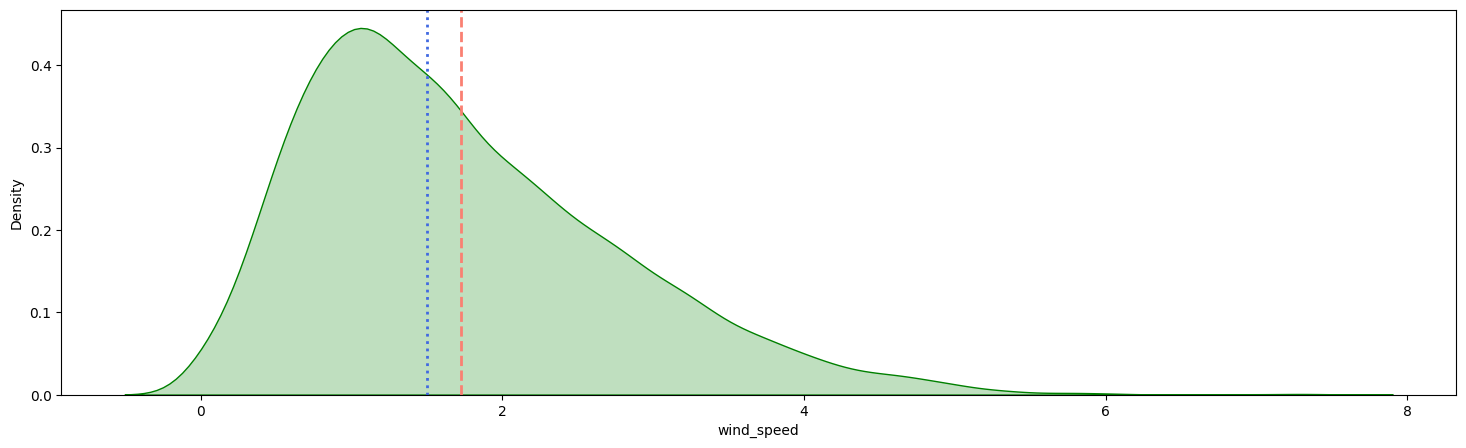

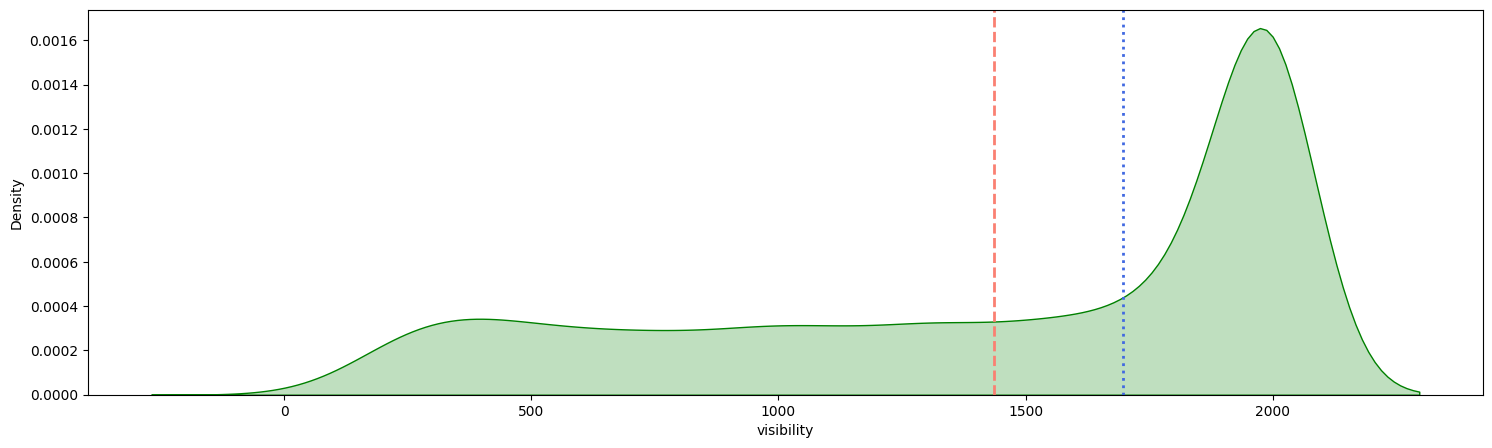

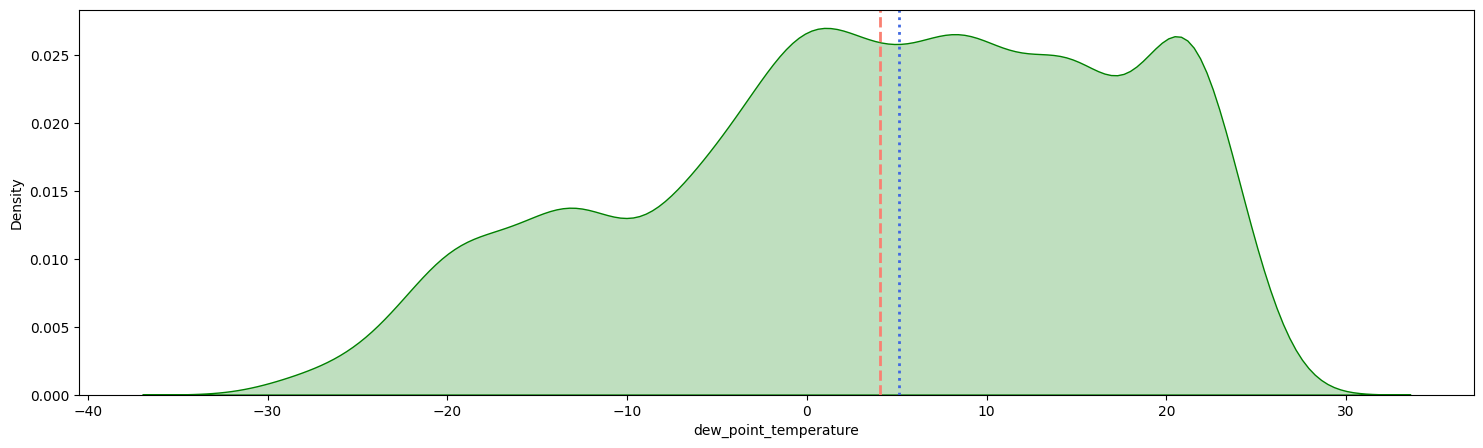

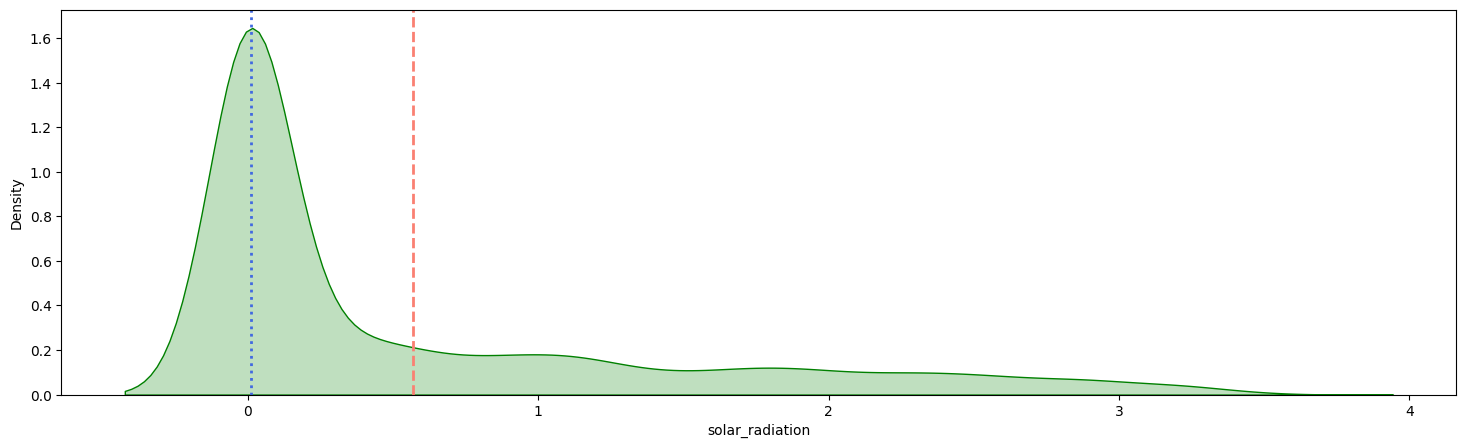

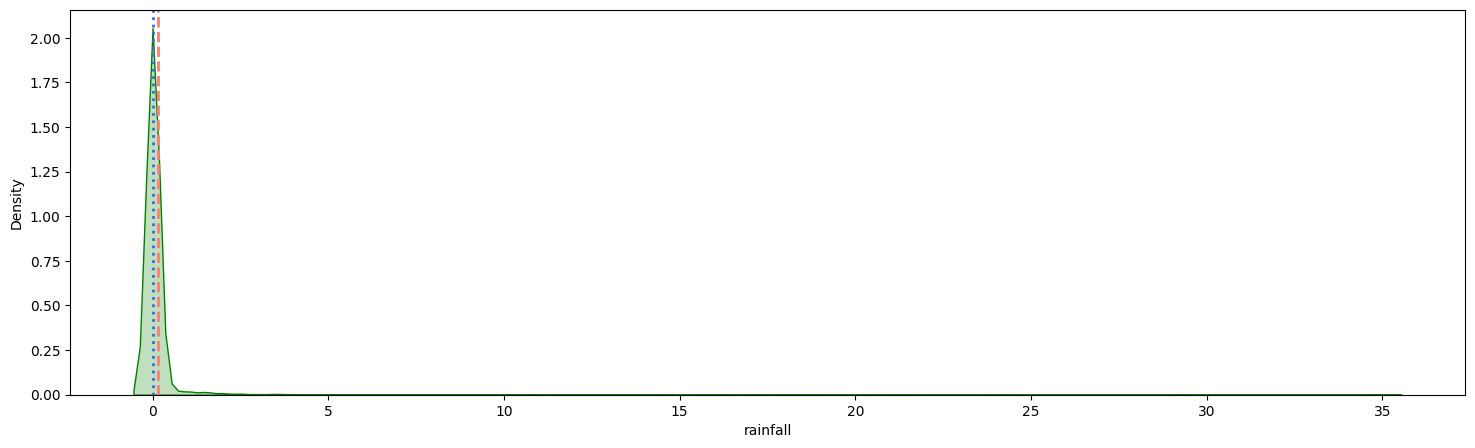

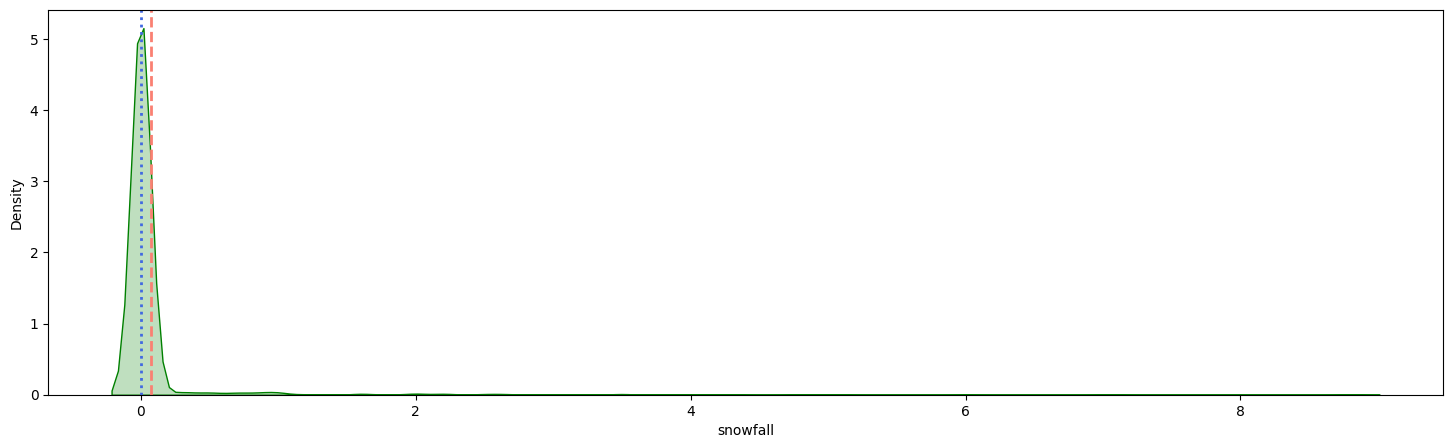

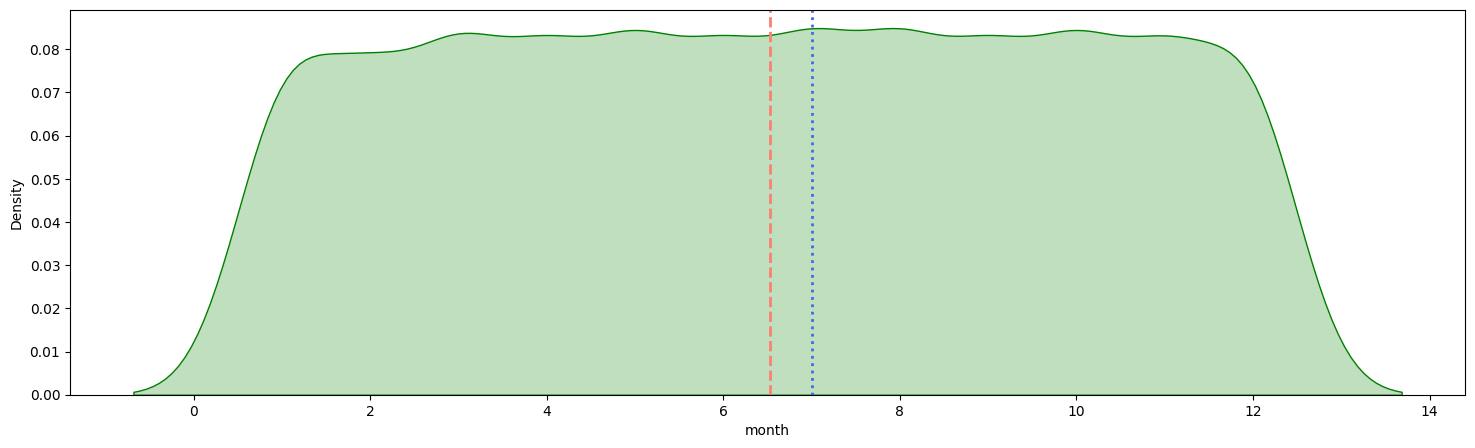

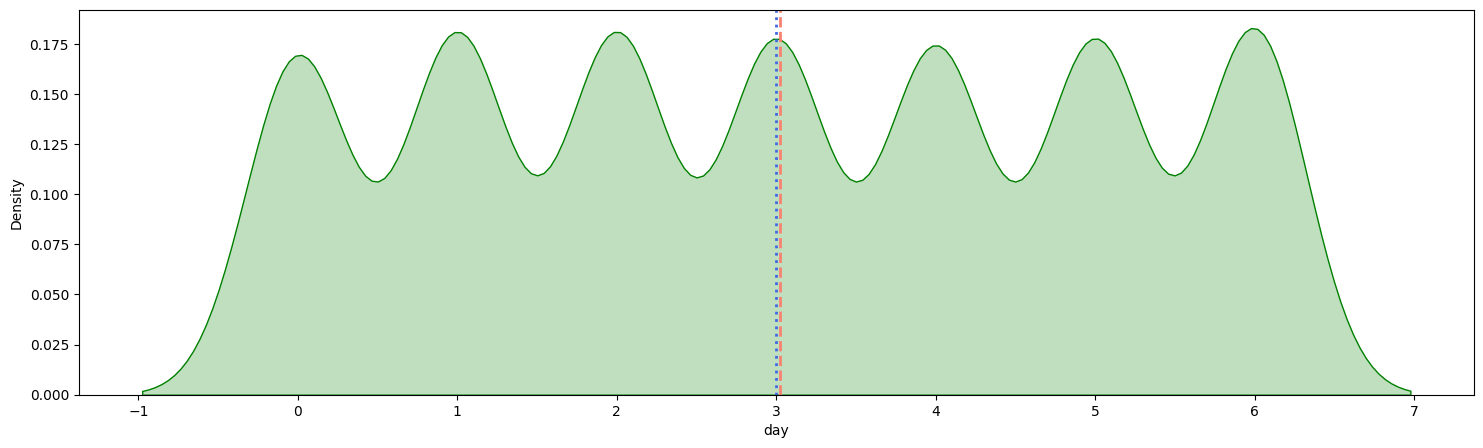

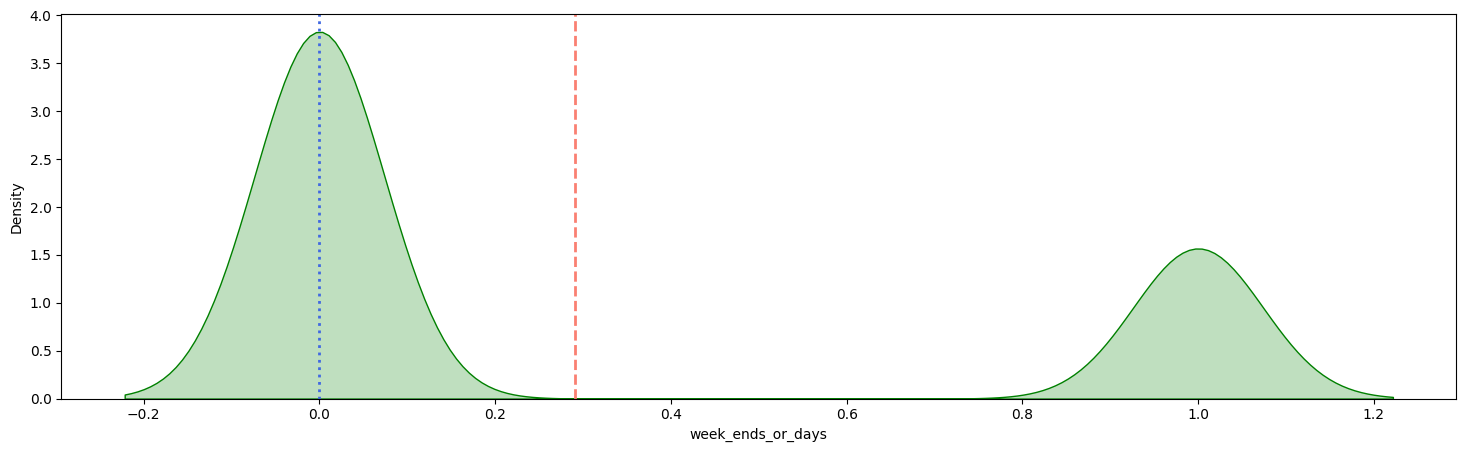

In [ ]:
# Chart - 11 visualization code
for i in num_cols:
  fig,ax=plt.subplots(figsize=(18,5))
  sns.kdeplot(dataset, x = i,fill = True, ax = ax, color='g')
  ax.axvline(dataset[i].mean(),color='salmon', linestyle='dashed', linewidth=2)
  ax.axvline(dataset[i].median(),color='royalblue', linestyle=':', linewidth=2)



##### 1. Why did you pick the specific chart?

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. In addition to this, we have also calculated and visualized median and mean, which will get us a firsthand idea of how skewed the data is, if there is any.

##### 2. What is/are the insight(s) found from the chart?

We can infer that our dependent variable 'bike_count' is highly right-skewed. This will lead to very high regression coefficient values as we will see ahead. To prevent this, we can take the square root of the values of 'bike_count' which will give us better results. The values in 'visibility' column are also heavily left-skewed indicating that the number of bikes rented increases as the visibility keeps on improving. The appropriate measure to clear 'visibility' will be taken ahead. The 'solar_radiation' column is also heavily right skewed indicating that as the amount of solar radiation increases, the number of bikes rented heavily decreases.

#### Chart - 9


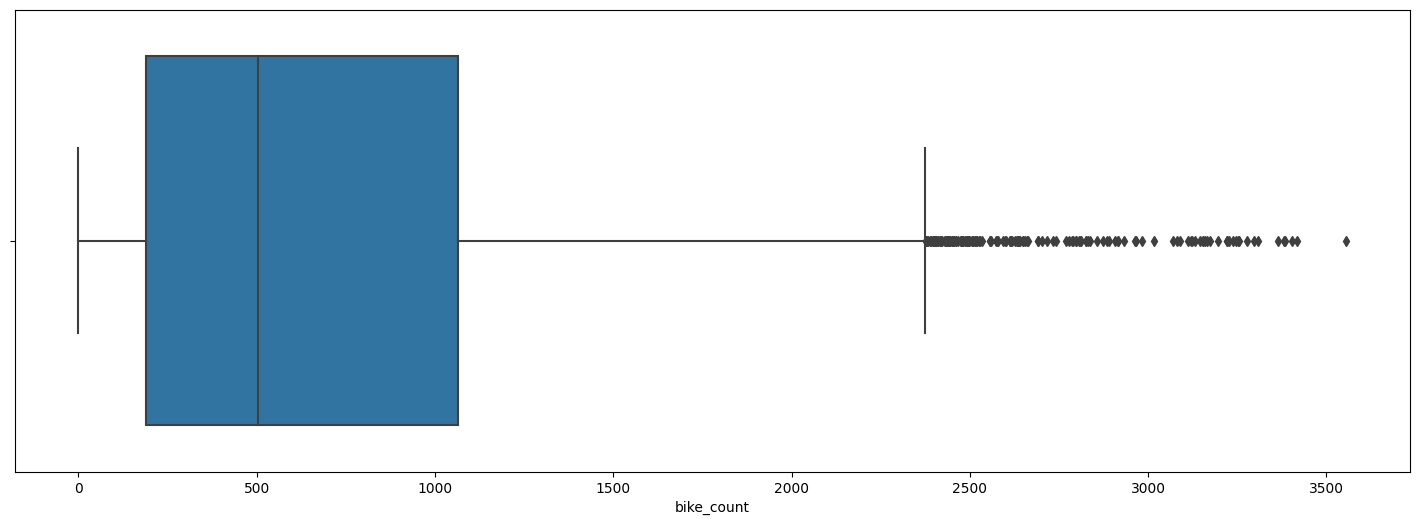

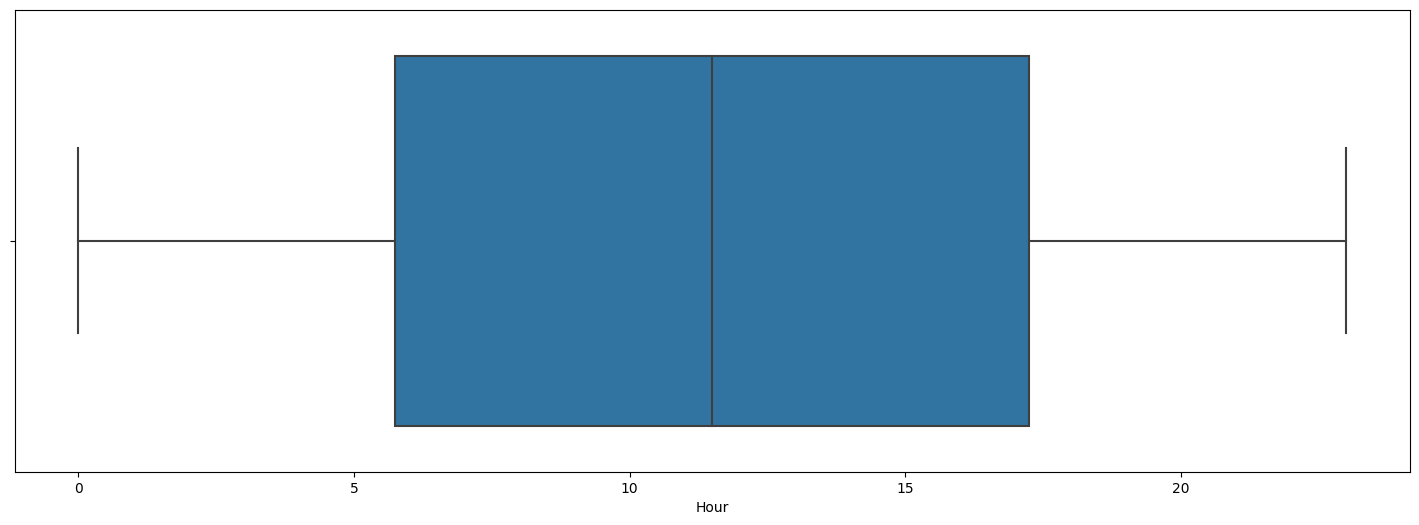

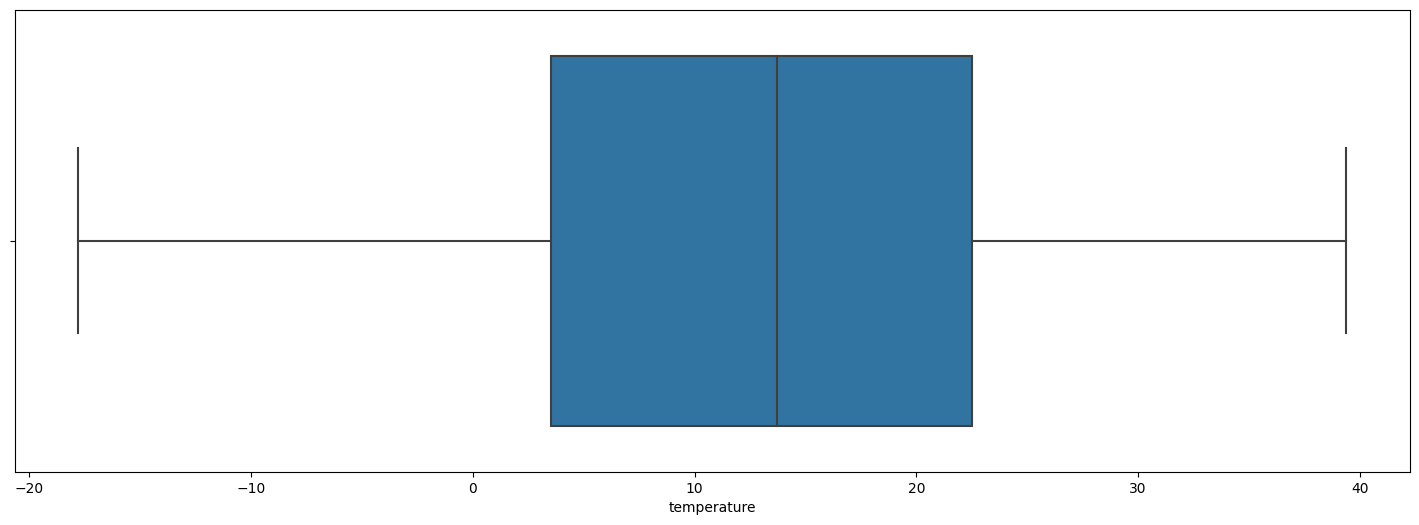

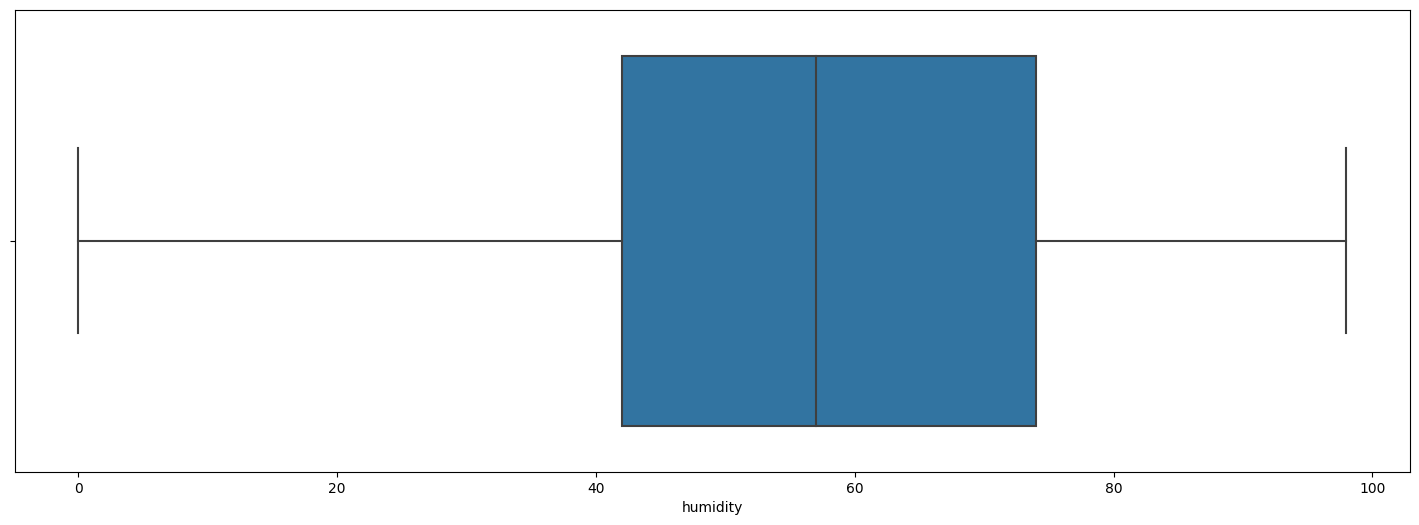

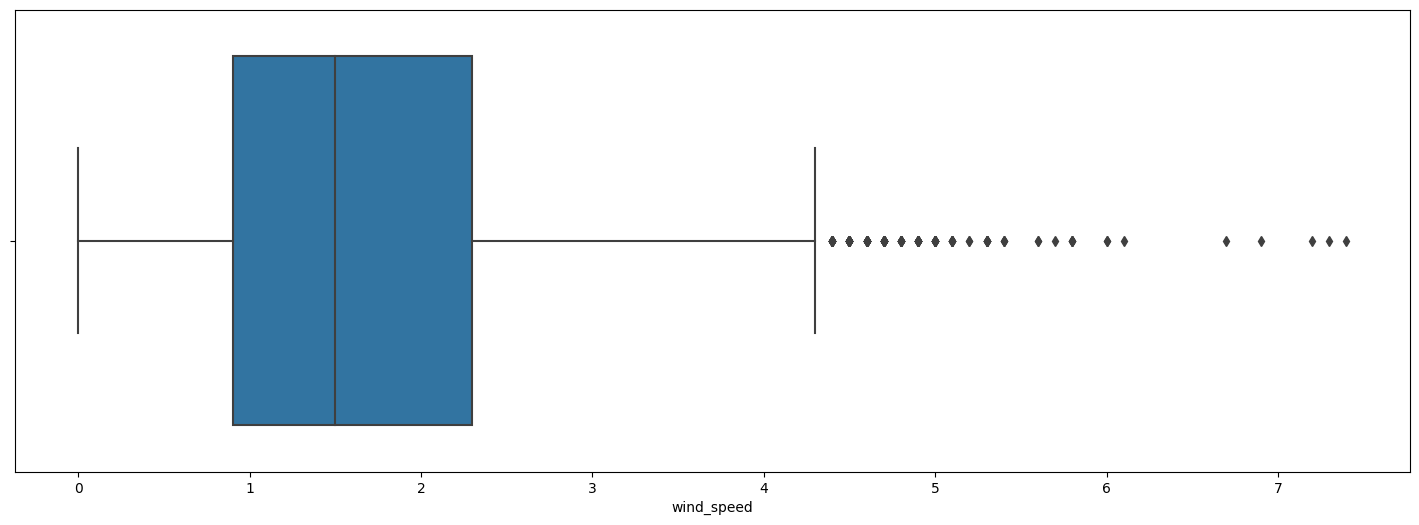

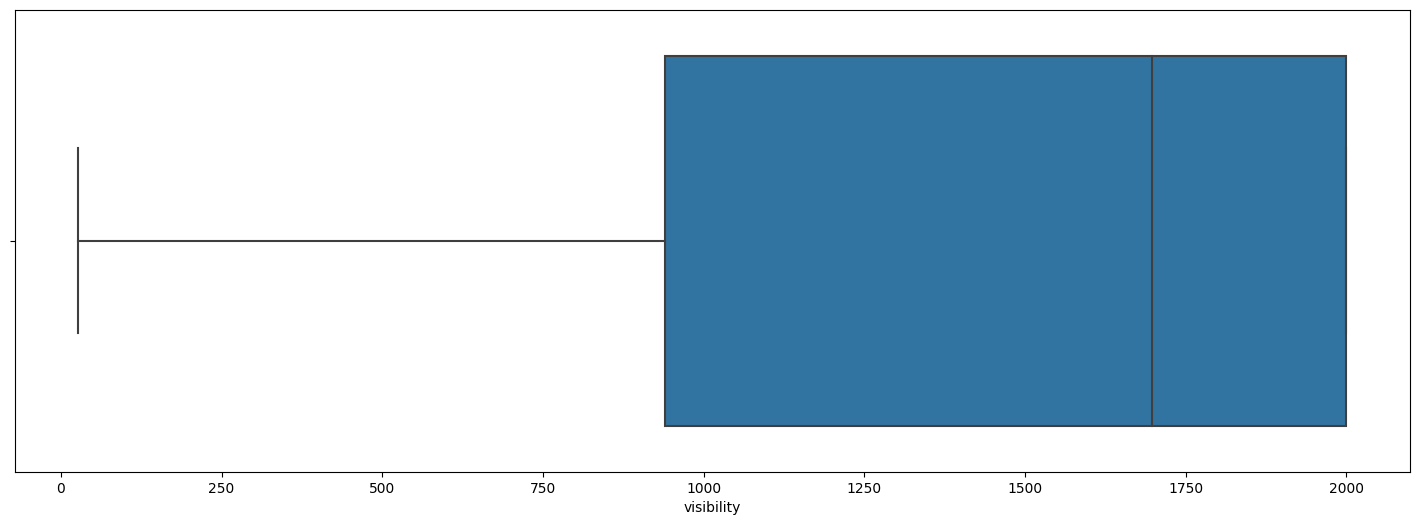

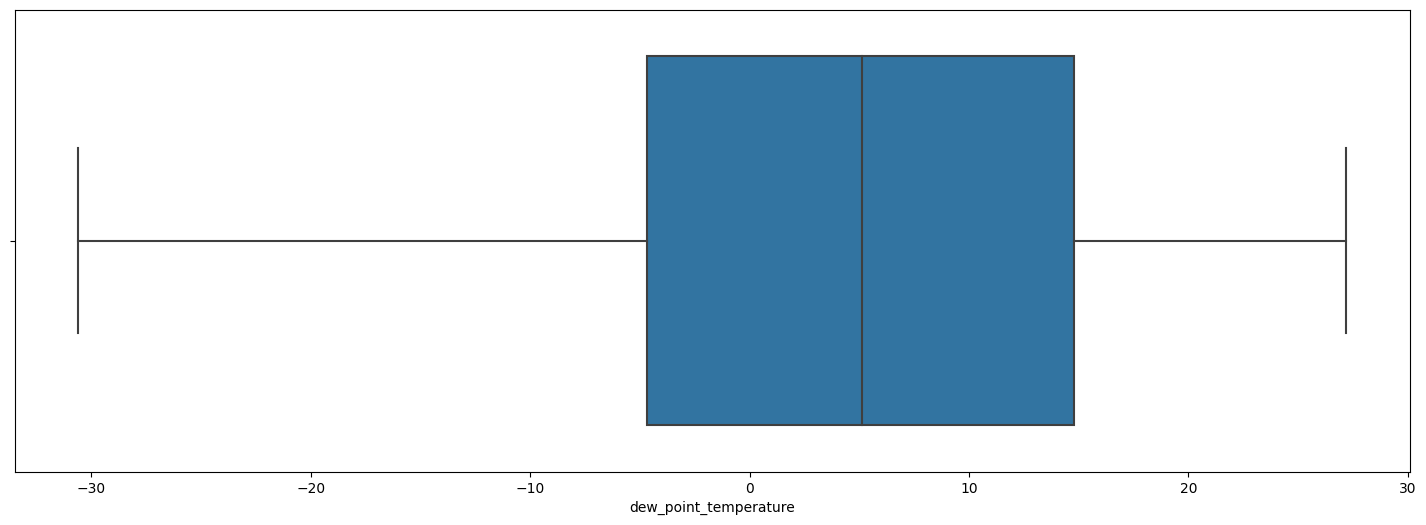

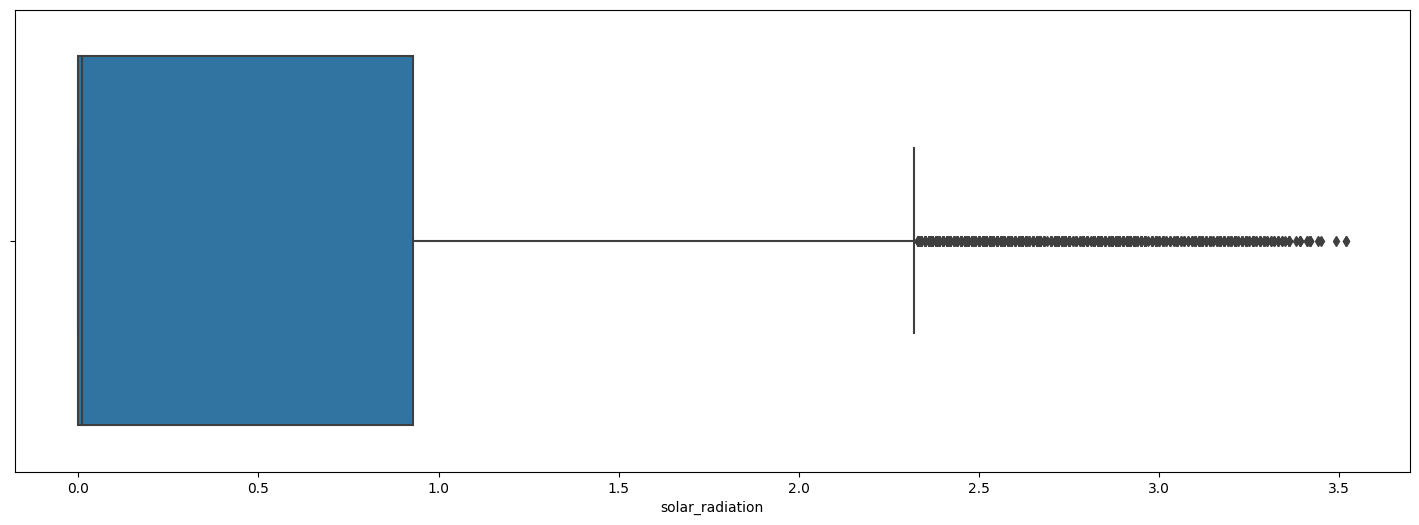

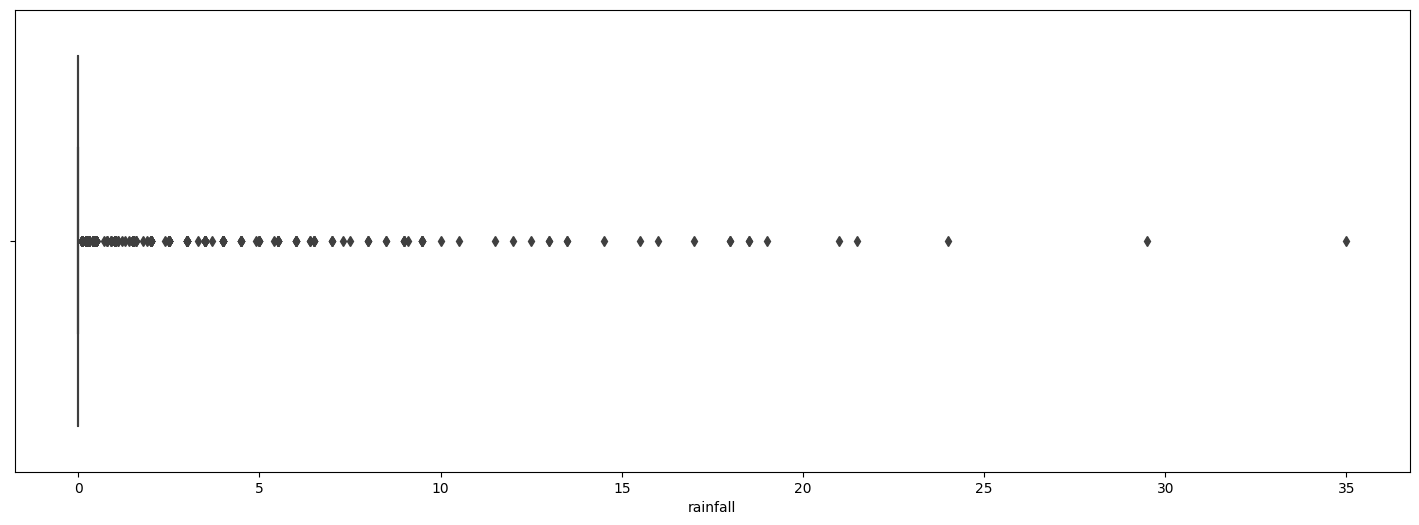

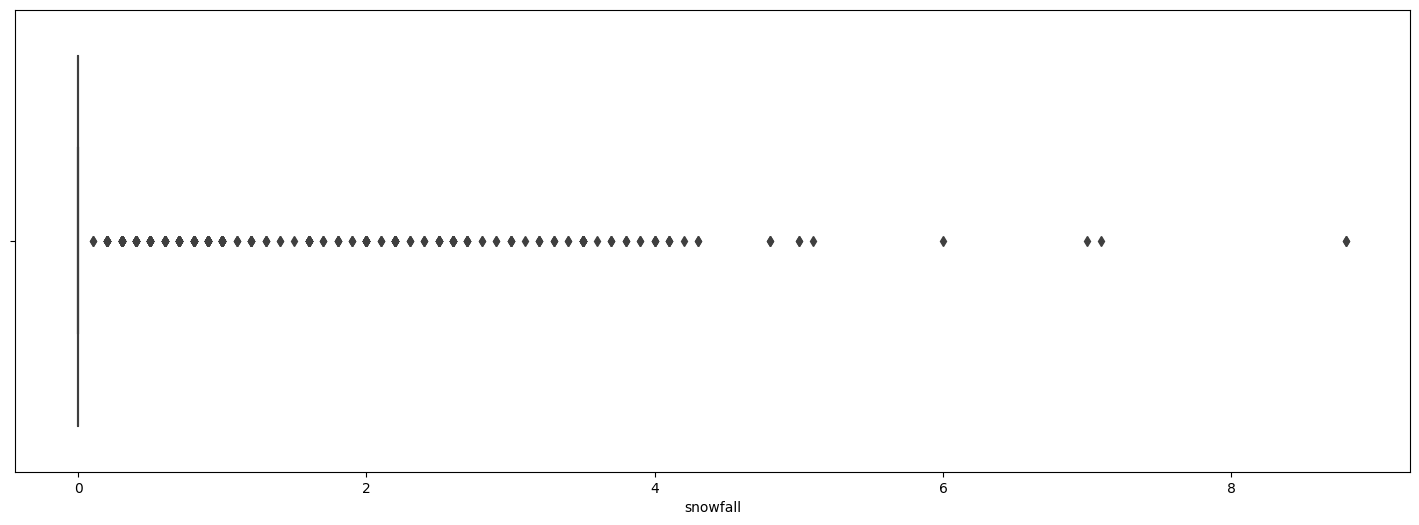

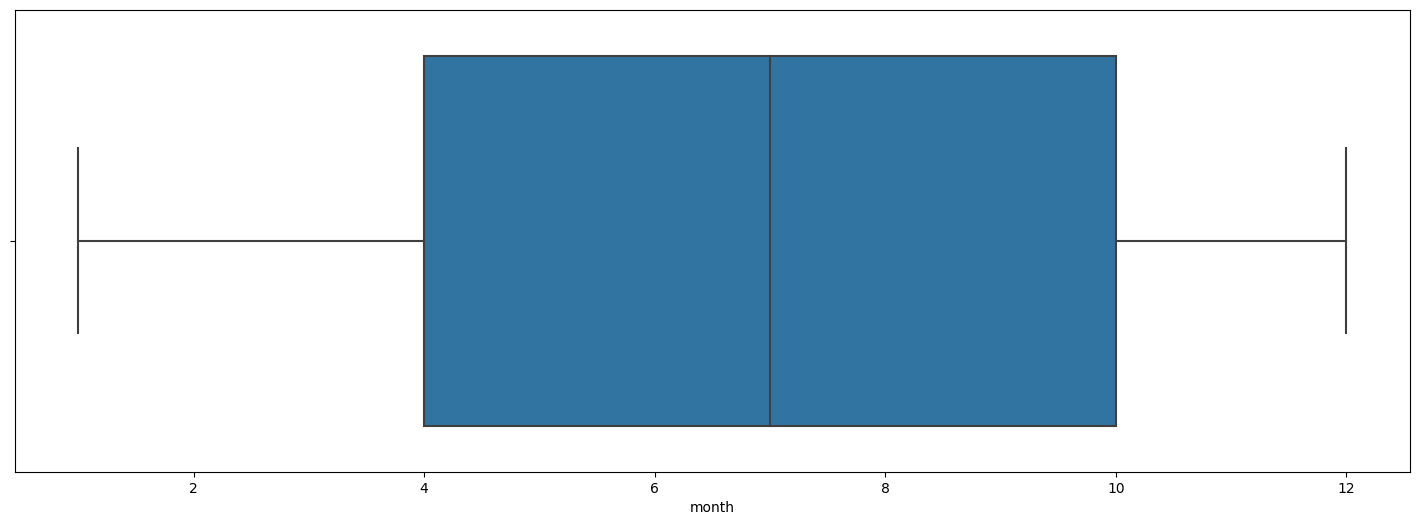

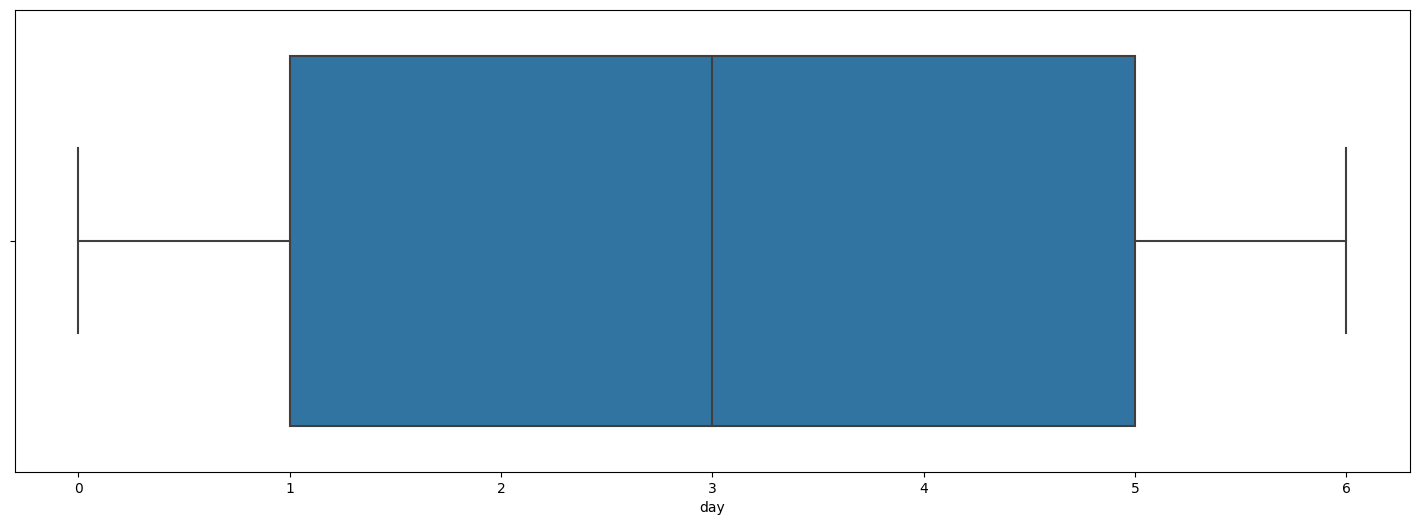

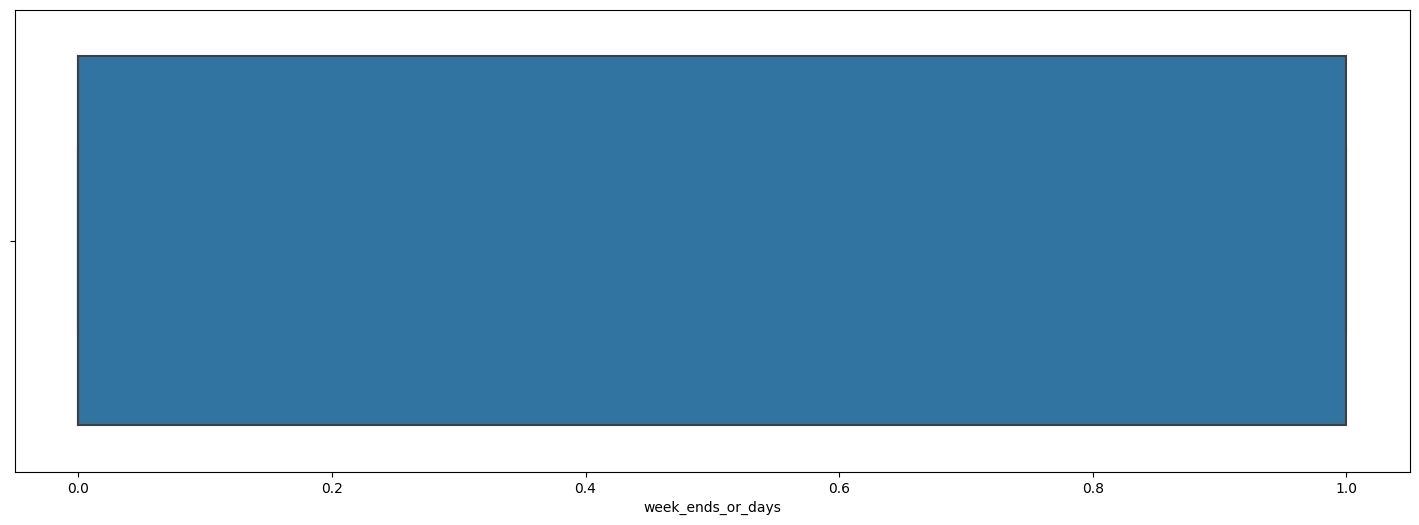

In [ ]:
# visualization code
for i in num_cols:
  fig = plt.figure(figsize=(18,6))
  ax=fig.gca()
  sns.boxplot(x=dataset[i])

##### 1. Why did you pick the specific chart?

A boxplot is a graph that gives a visual indication of how a dataset's mean, median, mode, minimum, maximum and outlier values are spread out and compare to each other

##### 2. What is/are the insight(s) found from the chart?

From the above charts, we can have an insight on how the datapoints in each variable of our dataframe is Statistically distributed.

#### Chart - 10 - Correlation Heatmap

<Axes: >

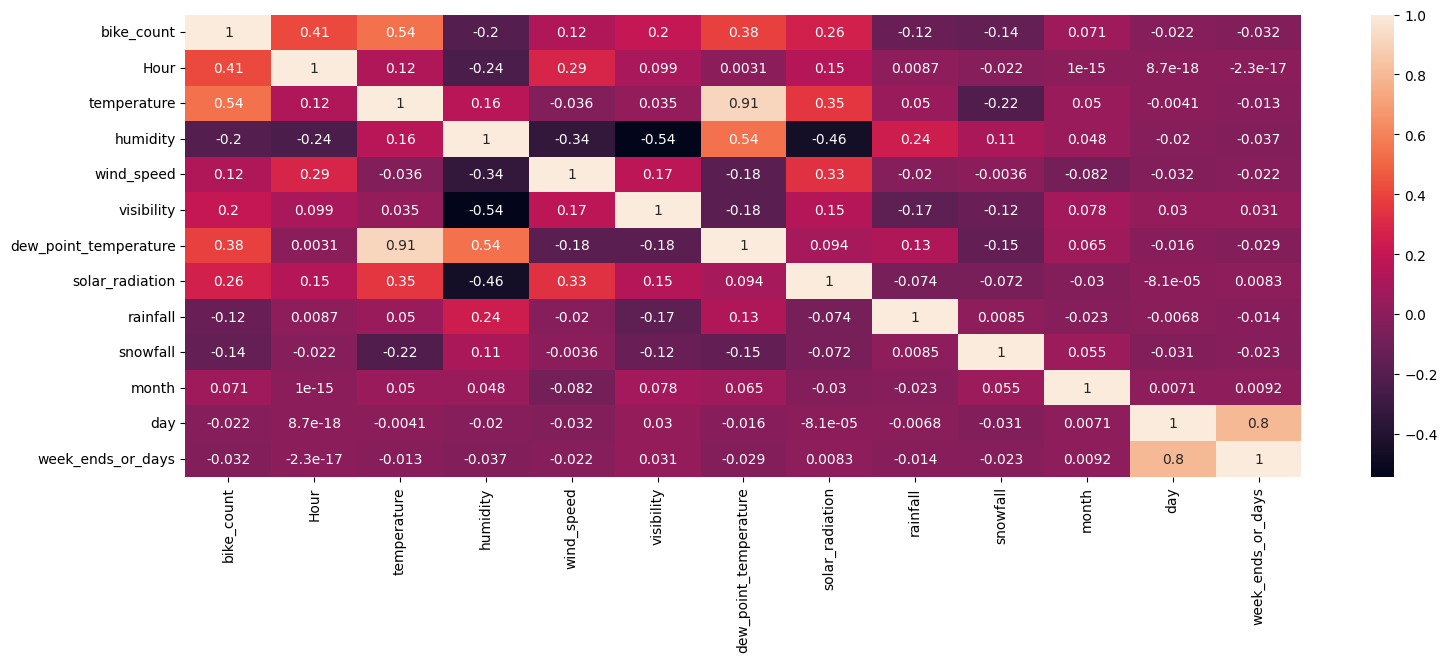

In [ ]:
# Correlation Heatmap visualization code
fig,ax = plt.subplots(figsize=(18,6))
sns.heatmap(dataset.corr(), annot= True)

##### 1. What is/are the insight(s) found from the chart?

From the above correlation map, we can infer that  

*    Our dependent variable 'bike_count' is highly positively correlated with 'hour', 'temperature', 'dew_point_temperature' and 'solar_radiation'

*   'hour' highly +vely correlated with 'wind_speed' and highly -vely correlated with 'humidity'

*   'temperature' highly +vely correalted with 'dew_point_temperature', 'bike_count', 'solar_radiation',

*   'humidity' is highly +vely correlated with 'dew_point_temperature' and 'rainfall' and highly -vely correlated with 'bike_count', 'hour', 'visibility', 'humidity' and 'solar_radiation'


#### Chart - 11 - Pair Plot

In [ ]:
# Pair Plot visualization code
fig,ax = plt.subplots(figsize=(18,6))
sns.pairplot(data=dataset, hue="bike_count")

##### 1. Why did you pick the specific chart?

Pair Plot helps in plotting pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
import statsmodels.api as sm
X = dataset[['temperature', 'wind_speed', 'solar_radiation', 'dew_point_temperature', 'humidity','rainfall', 'snowfall']]
Y = dataset['bike_count']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bike_count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     826.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:17:14   Log-Likelihood:                -66878.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8752   BIC:                         1.338e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   812.6277     99.962      8.129      0.000     616.679    1008.576
temperature              36.7244      4.163      8.822      0.000      28.564      44.885
wind_speed               52.2414      5.654      9.240      0.000      41.158      63.325
solar_radiation        -117.3327      8.468    -13.855      0.000    -133.933    -100.733
dew_point_temperature    -1.1171      4.386     -0.255      0.799      -9.714       7.480
humidity                -10.2274      1.141     -8.961      0.000     -12.465      -7.990
rainfall                -50.5557      4.929    -10.257      0.000     -60.217     -40.894
snowfall                 41.1673     12.804      3.215      0.001      16.067      66.267
==============================================================================
Omnibus:                      954.897   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1586.367
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       4.411   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0 :- Temperature has no effect on the number of bikes rented

Alternate Hypothesis :- Temperature has effect on the number of bikes rented

Level of Significance (α) = 5% = 0.05

In [ ]:
# We performed OLS Regression to find out the respective p-values for
# each of the columns

In [ ]:
p_value = model.pvalues[1]
if p_value > 0 and p_value <= 0.05 :
  print("We reject the Null Hypothesis and can conclude that change in Temperature has a significant effect on number of bikes rented")
elif p_value > 0.5 :
  print("We do not reject the Null Hypothesis and can conclude that Temperature has no significant effect on number of bikes rented")
else:
  print("Error calculating p-value (p-value cannot be negative)")

We reject the Null Hypothesis and can conclude that change in Temperature has a significant effect on number of bikes rented


##### Why did you choose the specific statistical test?

In statistics, ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model by the principle of least squares:minimizing the sum of squares of differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable.

### Hypothetical Statement - 2

Null Hypothesis H0 :- Snowfall has no effect on the number of bikes rented

Alternate Hypothesis :- Snowfall has effect on the number of bikes rented


Level of Significance (α) = 5% = 0.05

In [ ]:
# We performed OLS Regression to find out the respective p-values for
# each of the columns

In [ ]:
p_value = model.pvalues[7]
if p_value > 0 and p_value <= 0.05 :
  print("We reject the Null Hypothesis and can conclude that change in amount of Snowfall has a significant effect on number of bikes rented")
elif p_value > 0.5 :
  print("We do not reject the Null Hypothesis and can conclude that change in amount of Snowfall has no significant effect on number of bikes rented")
else:
  print("Error calculating p-value (p-value cannot be negative)")

We reject the Null Hypothesis and can conclude that change in amount of Snowfall has a significant effect on number of bikes rented


In statistics, ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model by the principle of least squares:minimizing the sum of squares of differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0 :- Dew point temperature has no effect on the number of bikes rented

Alternate Hypothesis :- Dew point temperature has effect on the number of bikes rented

Level of Significance (α) = 5% = 0.05

In [ ]:
# We performed OLS Regression to find out the respective p-values for
# each of the columns

In [ ]:
p_value = model.pvalues[4]
if p_value > 0 and p_value <= 0.05 :
  print("We reject the Null Hypothesis and can conclude that change in Dew point temperature has a significant effect on number of bikes rented")
elif p_value > 0.5 :
  print("We do not reject the Null Hypothesis and can conclude that change in Dew point temperature has no significant effect on number of bikes rented")
else:
  print("Error calculating p-value (p-value cannot be negative)")

We do not reject the Null Hypothesis and can conclude that change in Dew point temperature has no significant effect on number of bikes rented


##### Why did you choose the specific statistical test?

In statistics, ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model by the principle of least squares:minimizing the sum of squares of differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable.

### Hypothetical Statement - 4


#### 1. State your research hypothesis as a null and alternate hypothesis


Null Hypothesis H0:- The dependent variable 'bike_count' is normally distributed


Alternate hypothesis H1:- The dependent variable 'bike_count' is not normally distributed

In [ ]:
# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(dataset['bike_count'])
print("Test statistic value:", statistic)
print("p-value:", p_value)

Test statistic value: 0.8822193145751953
p-value: 0.0


In [ ]:
if p_value >= 0 and p_value <= 0.05 :
  print("We reject the Null Hypothesis and can conclude that our dependent variable 'bike_count' is not noramlly distributed")
elif p_value > 0.05 :
  print("We do not reject the Null Hypothesis and can conclude that our dependent variable 'bike_count' is normally distributed")
else:
  print("Error calculating p-value (p-value cannot be negative)")

We reject the Null Hypothesis and can conclude that our dependent variable 'bike_count' is not noramlly distributed


##### Why did you choose the specific statistical test?

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed.

## **Conclusion from Hypothesis Testing**

*   We find that change in temperature significantly impacts the number of bikes rented

*   We find that change in amount of snowfall also has a significant impact on the number of bikes rented

*   Through our calculations, we can also conclude that change in dew point temperature has no significant impact on the number of bikes rented

*   Using the Shapiro-Wilk test, we can conclude that our dependent variable 'bike_count; is NOT normally distributed


## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

**For the sake of simplicity, we can do one hot encoding on the categorical columns of our dataset.**

In [ ]:
# Encode your categorical columns
dataset['holiday'] = dataset['holiday'].map({'No Holiday':0,'Holiday':1})
dataset['functioning_day'] = dataset['functioning_day'].map({'Yes':1, 'No':0})

**Now since seasons have 4 different values, we won't be able to map it as 0 or 1. In this case, we will use pandas.get_dummies to create separate columns for each of these seasons, and if a particular row value matches with the specific season name, the value input for that season column will be 1, else 0. Example- if in the original seasons column, the first value is "Summer", then in the summer column, the value will be 1 and for rest of the columns of seasons, the value will be zero. Here, we will drop 'autumn' column because if for a particular value, all the three columns have value as 0, it is clear that the value belongs to the fourth category**

In [ ]:
dataset_season = pd.get_dummies(dataset['seasons'], drop_first = True)
dataset_season.head()
dataset = pd.concat([dataset, dataset_season], axis = 1)

In [ ]:
# We can drop the seasons column now
dataset.drop(['seasons','date'], axis = 1, inplace =True)

In [ ]:
dataset.columns

Index(['bike_count', 'Hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'holiday', 'functioning_day', 'month', 'day',
       'week_ends_or_days', 'Spring', 'Summer', 'Winter'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
dataset.skew().sort_values()

functioning_day          -5.170969
visibility               -0.701786
dew_point_temperature    -0.367298
temperature              -0.198326
month                    -0.010458
Hour                      0.000000
day                       0.000688
humidity                  0.059579
wind_speed                0.890955
week_ends_or_days         0.923555
Spring                    1.142294
Summer                    1.142294
bike_count                1.153428
Winter                    1.176139
solar_radiation           1.504040
holiday                   4.163603
snowfall                  8.440801
rainfall                 14.533232
dtype: float64

**From the above values, we can infer that the skewness values of snowfall and rainfall features are too high. To resolve this, we use log transformation on these two columns. Now, to avoid infintity error, we replace all values of 0 with 1**

In [ ]:
dataset['rainfall']= dataset['rainfall'].replace([0],1)
dataset['snowfall']= dataset['snowfall'].replace([0],1)
dataset['log_rainfall'] = np.log(dataset['rainfall'])
dataset['log_snowfall'] = np.log(dataset['snowfall'])

In [ ]:
dataset.skew().sort_values()

functioning_day          -5.170969
visibility               -0.701786
dew_point_temperature    -0.367298
temperature              -0.198326
month                    -0.010458
Hour                      0.000000
day                       0.000688
humidity                  0.059579
log_snowfall              0.387444
wind_speed                0.890955
week_ends_or_days         0.923555
log_rainfall              1.083205
Summer                    1.142294
Spring                    1.142294
bike_count                1.153428
Winter                    1.176139
solar_radiation           1.504040
holiday                   4.163603
snowfall                 10.888112
rainfall                 16.415636
dtype: float64

**As we can see, after the log transformation, the problem of skewness in rainfall and snowfall column have gone. We can now safely drop these columns from our dataset**

In [ ]:
dataset.drop(['rainfall','snowfall'],axis=1, inplace= True)

In [ ]:
# now we will calculate multicollinearity
def calculate_vif(x):
  vif=pd.DataFrame()
  vif['columns'] = x.columns
  vif['VIF_value'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return (vif)

In [ ]:
calculate_vif(dataset[[i for i in dataset.describe().columns if i not in ['bike_count']]])

columns  VIF_value
0                    Hour   4.538821
1             temperature  48.295156
2                humidity  24.300607
3              wind_speed   4.924061
4              visibility   9.783218
5   dew_point_temperature  32.015369
6         solar_radiation   2.881166
7                 holiday   1.076611
8         functioning_day  30.430225
9                   month   5.521383
10                    day   8.990671
11      week_ends_or_days   3.854871
12                 Spring   2.594132
13                 Summer   3.514135
14                 Winter   4.794802
15           log_rainfall   1.018995
16           log_snowfall   1.026019

**Here we can see that the features 'temperature' and 'dew_point_temperature' have a very high VIF value and correlation value, so it is advisable that we drop one of the columns with lesser significance. In our case, dew_point_temperature is a scientific weather measurement and is not indicative of demand in rented bikes. We drop 'dew_point_temperature' column **

In [ ]:
dataset.drop('dew_point_temperature',axis=1, inplace=True)

In [ ]:
# calculating vif again for our dataframe
calculate_vif(dataset[[i for i in dataset.describe().columns if i not in ['bike_count']]])

columns  VIF_value
0                Hour   4.404989
1         temperature  10.559181
2            humidity  12.207522
3          wind_speed   4.843330
4          visibility   7.265894
5     solar_radiation   2.576035
6             holiday   1.076459
7     functioning_day  23.615705
8               month   5.223882
9                 day   8.824673
10  week_ends_or_days   3.844884
11             Spring   2.463820
12             Summer   3.383831
13             Winter   4.263852
14       log_rainfall   1.018488
15       log_snowfall   1.025273

**Since the VIF of the columns- humidity, visibility and day is more than 5, we can safely drop these columns.**

In [ ]:
dataset.drop(['day', 'humidity','visibility'],axis=1, inplace = True)

In [ ]:
# We create a new dataframe and copy the original dataframe to this new dataframe
# We are doing this so we can see the effect of removing major columns on the VIF
d1 = dataset.copy()

In [ ]:
calculate_vif(d1[[i for i in d1.describe().columns if i not in ['bike_count']]])

columns  VIF_value
0                Hour   4.316381
1         temperature   9.100110
2          wind_speed   4.644220
3     solar_radiation   1.952514
4             holiday   1.074450
5     functioning_day  14.354224
6               month   4.627724
7   week_ends_or_days   1.393931
8              Spring   2.375721
9              Summer   3.366962
10             Winter   4.129430
11       log_rainfall   1.007312
12       log_snowfall   1.017839

In [ ]:
# We see that the temperature columns has a very high VIF. This maybe because
# during different seasons the temperatures vary and looking at the temperatures,
# we can broadly say which season is going on
d1.drop(['Winter'],axis=1, inplace = True)

In [ ]:
calculate_vif(d1[[i for i in d1.describe().columns if i not in ['bike_count']]])

columns  VIF_value
0                Hour   4.186100
1         temperature   5.255121
2          wind_speed   4.525378
3     solar_radiation   1.924511
4             holiday   1.061581
5     functioning_day   8.919489
6               month   4.455639
7   week_ends_or_days   1.390232
8              Spring   1.900374
9              Summer   3.353735
10       log_rainfall   1.006380
11       log_snowfall   1.015065

<Axes: >

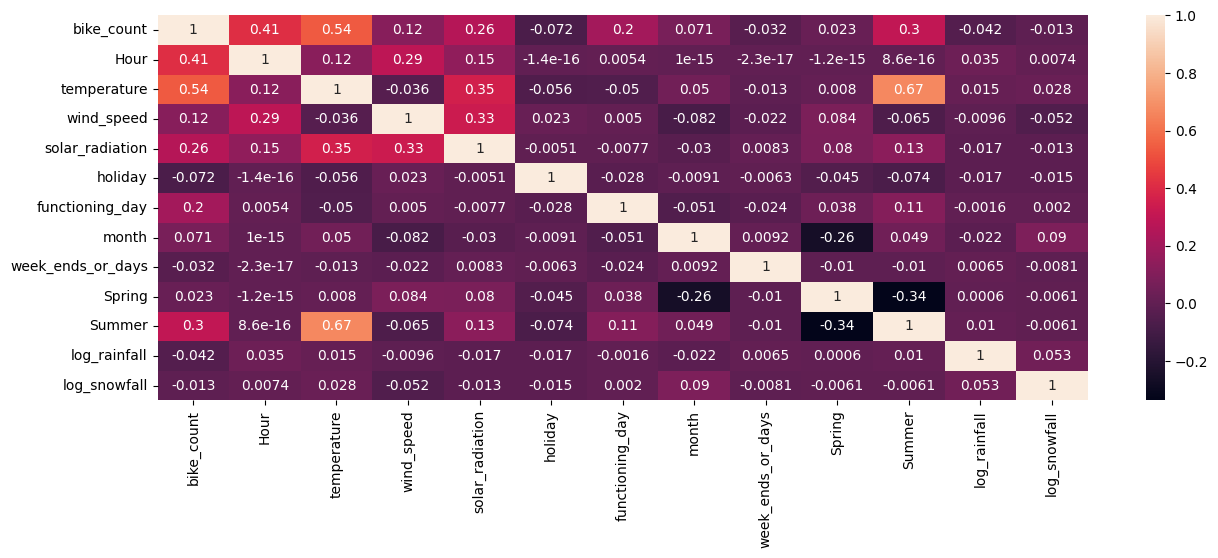

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(d1.corr(), annot= True)

**As we can see, after removing the Winter column, the vif of temperature decreases, so we can try removing all the columns of seasons. Secondly, we also see that the solar_radiatioon column is also correlated with temperature. This is because increase in solar_radiation indicates that the weather is sunny, which further indicates that the temperature is high. So, we can drop the 'solar_radiation' column too.**

In [ ]:
dataset.drop(['Spring','Summer','Winter','solar_radiation','wind_speed'],axis=1, inplace = True)

In [ ]:
calculate_vif(dataset[[i for i in dataset.describe().columns if i not in ['bike_count']]])

columns  VIF_value
0               Hour   3.608759
1        temperature   2.149166
2            holiday   1.050986
3    functioning_day   6.496079
4              month   4.109368
5  week_ends_or_days   1.389362
6       log_rainfall   1.005548
7       log_snowfall   1.010955

<Axes: >

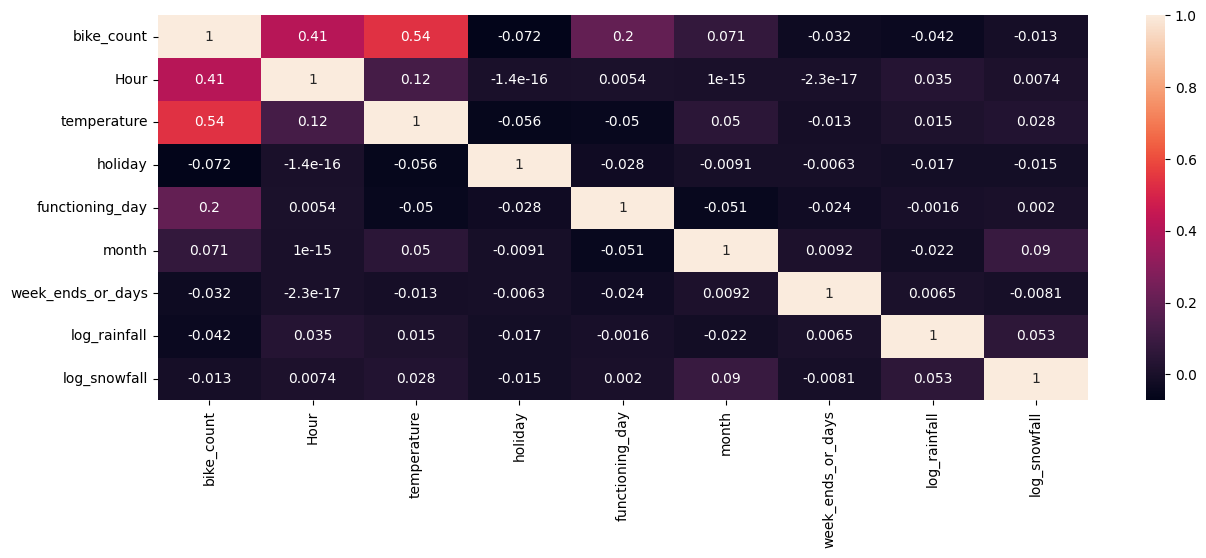

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sns.heatmap(dataset.corr(), annot= True)

**Now, as we can see, the VIFs of the columns are now well within range and we can continue with the further steps.**

### 3. Pruning the Outliers

In [ ]:
def zscore(series):
    return (series-series.mean())/series.std()

In [ ]:
dataset.columns

Index(['bike_count', 'Hour', 'temperature', 'holiday', 'functioning_day',
       'month', 'week_ends_or_days', 'log_rainfall', 'log_snowfall'],
      dtype='object')

In [ ]:
# We create a new column 'count_zscore' which contains the z-score value
dataset['count_zscore'] = dataset.groupby(['Hour', 'functioning_day'])['bike_count'].transform(zscore)

# If the z-score are greater than 4, this means the values are extreme outliers
# and removing these values from the dataset will hep in giving unbiased calculations.
outlier_idx = np.abs(dataset['count_zscore'])>4
outlier_data = dataset.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 10)


bike_count  Hour  temperature  holiday  functioning_day  month  \
4922        1254     2         20.9        0                1      6   

      week_ends_or_days  log_rainfall  log_snowfall  count_zscore  
4922                  1           0.0           0.0      4.577229

In [ ]:
# Removing the entry from our dataframe.
dataset = dataset.loc[~outlier_idx, :]
print('Shape of data after outlier pruning: ', dataset.shape)

Shape of data after outlier pruning:  (8759, 10)


In [ ]:
# Now we can remove the newwly made column from our dataframe.
dataset = dataset.drop('count_zscore', axis=1)

**Now all our columns are of integer or float datatype, with little or no multicollinearity and little or no skewness. Our data is ready for modelling now**

**Now our data is ready for modelling**

### 3. Data Splitting

In [ ]:
# Here, column'bike_count' will be our dependent variable (y) and rest of the
# columns will be our independent variables(xi)
x=dataset.drop(['bike_count'],axis = 1)
# we won't use inplace=True because we don't want to drop the column from our dataset
y=dataset['bike_count']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 8888)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6131, 8)
(6131,)
(2628, 8)
(2628,)


We are using a split of 70:30 i.e. 70% of the datasset goes for training and the rest 30% is kept as testing data on which we can run our fitted model to check the accuracy of predictions

### 4. Data Scaling

We are using MinMaxScaler here to scale our data because MinMaxScaler ensures that the values in each column are within a certain range and contribute equally to the analysis

The formula to scale a value using MinMaxScaler:-

x_scaled = (x - x_min)/(x_max - x_min)

In [ ]:
min_max= MinMaxScaler()
x_train = min_max.fit_transform(x_train)
x_test = min_max.fit_transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6131, 8)
(6131,)
(2628, 8)
(2628,)


## ***7. ML Model Implementation***

In [ ]:
def get_time(name, t):
  print("Training time in seconds:-", t)
  metrics_values = {'Name': name, "Training time(sec)":round(t,4)}
  global time_df
  time_df=pd.DataFrame(metrics_values, index=[1])


In [ ]:
def get_metrics(x, y, z):
  mse = mean_squared_error(x, y)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(x, y)
  r2 = r2_score(x, y)
  print("The Mean Squared Error(MSE) is:-",mse)
  print("The Root Mean Squared Error(RMSE) is:-",rmse)
  print("The Mean Absolute Error(MAE) is:-",mae)
  print("The R2 Score is:-",r2)
  metrics_values = {'Name': z, 'MSE':round(mse,3), 'RMSE':round(rmse,3), 'MAE':round(mae,3), "R2 Score":round(r2, 5)}
  global results_df
  results_df=pd.DataFrame(metrics_values, index=[1])


In [ ]:
# Visualizing evaluation Metric Score chart
def plot_scatter(x, y):
  plt.figure(figsize=(10,3))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

def plot_distplot(x, y):
  plt.figure(figsize=(10,3))
  sns.distplot(x=x-y)
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


### ML Model 1 - Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
coef = linear_reg.coef_
coef

array([ 752.39937435, 1545.360173  ,  -92.48566732,  800.39804884,
        132.95038063,  -21.60953293, -535.44245809, -414.1326136 ])

In [ ]:
# for better visualization of coefficient values
pd.DataFrame(coef, x.columns, columns=['Coef value'])

Coef value
Hour                752.399374
temperature        1545.360173
holiday             -92.485667
functioning_day     800.398049
month               132.950381
week_ends_or_days   -21.609533
log_rainfall       -535.442458
log_snowfall       -414.132614

** Here, we can see even after scaling after our inputs, we are getting very large regression coefficient values. This can be because of the high values of y in training set, so while declaring our dependent varaible, we can take square root to standardize the values.**

In [ ]:
# Here, column'bike_count' will be our dependent variable (y) and rest of the
# columns will be our independent variables(xi)
x=dataset.drop(['bike_count'],axis = 1)

# we won't use inplace=True because we don't want to drop the column from our dataset
y=np.sqrt(dataset['bike_count'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 8888)

In [ ]:
linear_reg = LinearRegression()
t0 = time.time()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
coef = linear_reg.coef_

# for better visualization of coefficient values
pd.DataFrame(coef, x.columns, columns=['Coef value'])

Coef value
Hour                 0.597956
temperature          0.534989
holiday             -2.430661
functioning_day     25.681171
month                0.260587
week_ends_or_days   -0.356337
log_rainfall        -2.748206
log_snowfall        -2.363259

**Now the coefficient values are much better**

In [ ]:
print("Intercept Value:-",linear_reg.intercept_)
print("Regression Score:-",linear_reg.score(x_train, y_train))

Intercept Value:- -16.624695302074194
Regression Score:- 0.5518076286484013


**The score is 0.55 that means that our model is able to capture only around 58.55% of the total variance in our dataset**

In [ ]:
y_pred=linear_reg.predict(x_test)
time_in_sec = time.time() - t0

In [ ]:
get_time("Linear Regression", time_in_sec)
times = time_df.copy()

Training time in seconds:- 0.14142417907714844


In [ ]:
get_metrics(y_test, y_pred, 'Linear Regression')
test_df = results_df.copy()

The Mean Squared Error(MSE) is:- 69.58818987087813
The Root Mean Squared Error(RMSE) is:- 8.341953600379117
The Mean Absolute Error(MAE) is:- 6.414560465950961
The R2 Score is:- 0.5575438292809483


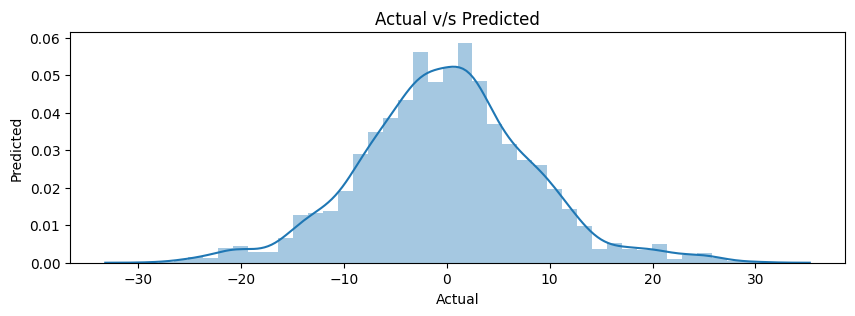

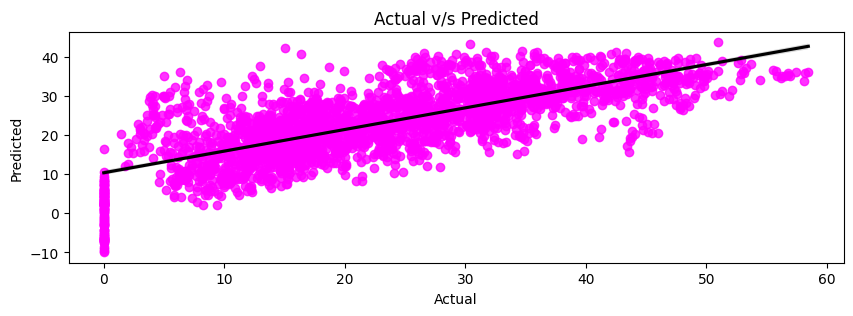

In [ ]:
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

**For comparison, we will also use our model to predict on the training data as well**

In [ ]:
y_train_pred = linear_reg.predict(x_train)

In [ ]:
get_metrics(y_train, y_train_pred, 'Linear Regression')
train_df = results_df.copy()

The Mean Squared Error(MSE) is:- 69.03910853165357
The Root Mean Squared Error(RMSE) is:- 8.308977586421422
The Mean Absolute Error(MAE) is:- 6.392441062055872
The R2 Score is:- 0.5518076286484013


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

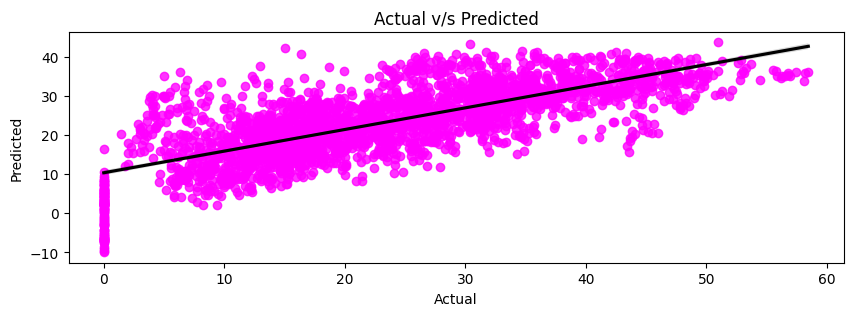

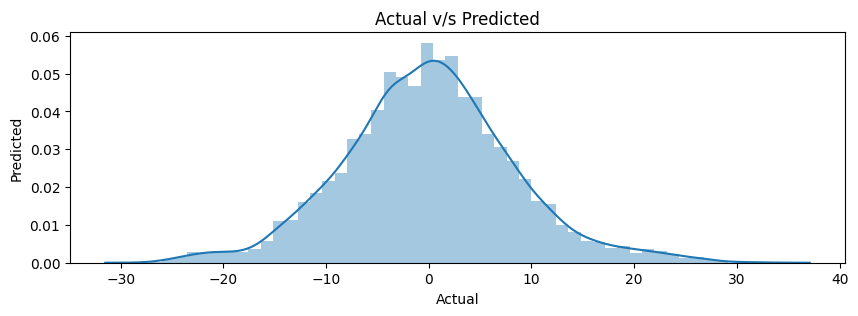

In [ ]:
# Visualizing for training data as well
plot_scatter(y_train_pred, y_train)
plot_distplot(y_train_pred, y_train)

### ML Model - 2 - Lasso Regression

In [ ]:
t0 = time.time()
lasso_reg=Lasso(alpha = 0.1, max_iter = 10000)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
coef = lasso_reg.coef_
pd.DataFrame(coef, x.columns, columns=[1])

1
Hour                0.597026
temperature         0.533496
holiday            -0.339559
functioning_day    22.381543
month               0.234700
week_ends_or_days  -0.000000
log_rainfall       -1.782738
log_snowfall       -0.000000

In [ ]:
y_pred = lasso_reg.predict(x_test)
y_training_pred = lasso_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Lasso Regression", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 0.08882761001586914


In [ ]:
get_metrics(y_test, y_pred, 'Lasso Regression')
test_df = test_df.append(results_df, ignore_index= True)

The Mean Squared Error(MSE) is:- 71.4770251565991
The Root Mean Squared Error(RMSE) is:- 8.454408622523465
The Mean Absolute Error(MAE) is:- 6.518278708728327
The R2 Score is:- 0.5455342220589493


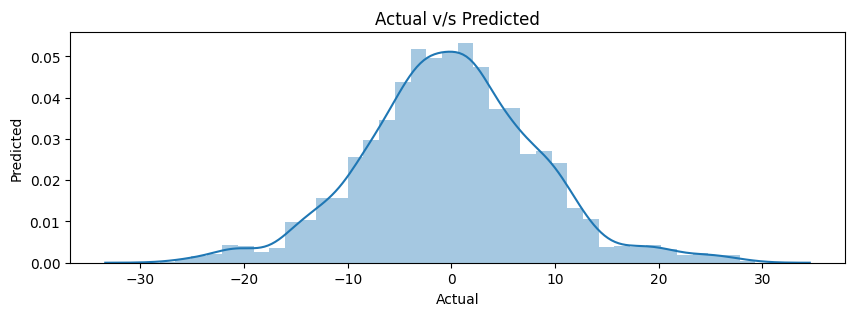

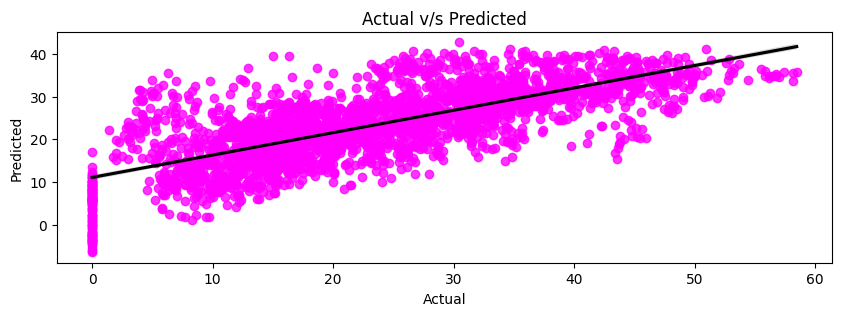

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, 'Lasso Regression')
train_df = train_df.append(results_df, ignore_index= True)

The Mean Squared Error(MSE) is:- 69.91045086325802
The Root Mean Squared Error(RMSE) is:- 8.361246968201455
The Mean Absolute Error(MAE) is:- 6.452353072945142
The R2 Score is:- 0.5461509943991081


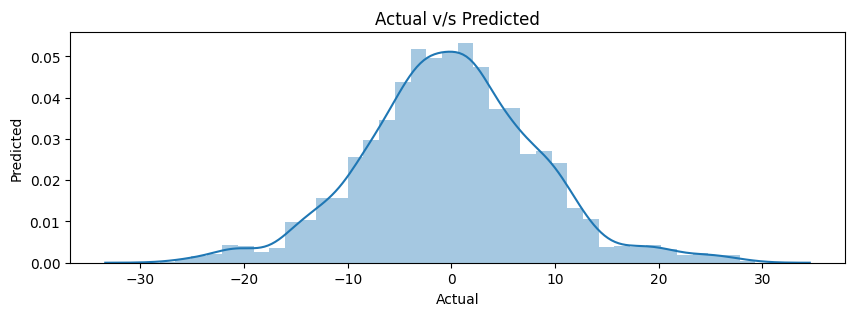

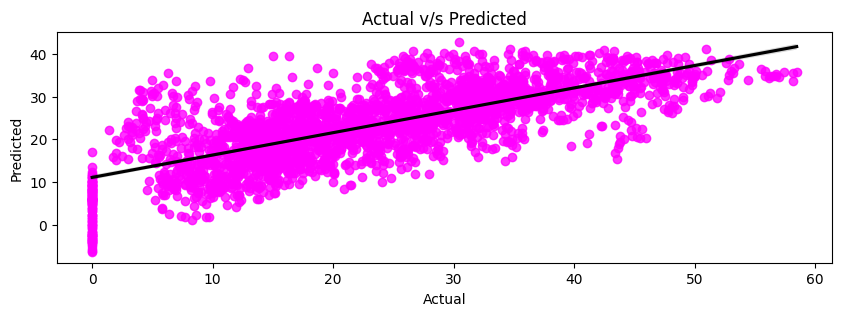

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_training_pred, y_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
t0 = time.time()
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_cv = GridSearchCV(lasso_reg, alphas, scoring='neg_mean_squared_error')
lasso_cv.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(alpha=0.1, max_iter=10000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Score:-",lasso_cv.best_score_)
print("Best parameters:-",lasso_cv.best_params_)

Best Score:- -69.22087400239802
Best parameters:- {'alpha': 0.001}


In [ ]:
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
y_training_pred = lasso_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Lasso Regression (GridSearchCV)", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 5.842481374740601


In [ ]:
get_metrics(y_test, y_pred, "Lasso Regression(GridSearchCV)")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.59724993799848
The Root Mean Squared Error(RMSE) is:- 8.342496624991735
The Mean Absolute Error(MAE) is:- 6.41523812966939
The R2 Score is:- 0.5574862234916329


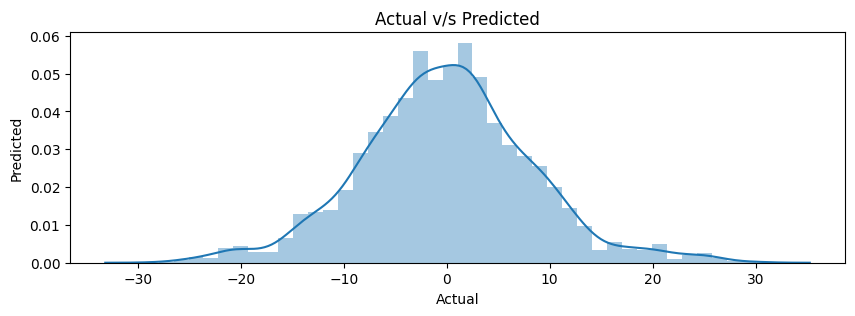

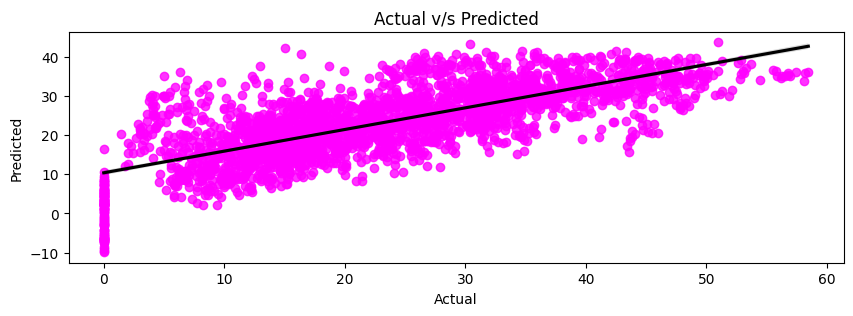

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, "Lasso Regression(GridSearchCV)")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.03920418047477
The Root Mean Squared Error(RMSE) is:- 8.308983342170976
The Mean Absolute Error(MAE) is:- 6.3926207821913605
The R2 Score is:- 0.551807007709445


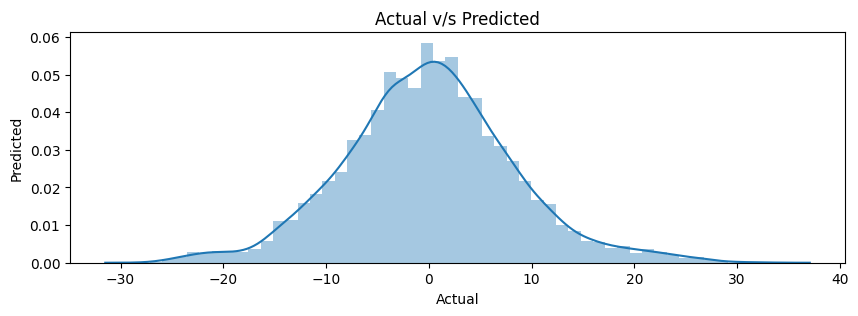

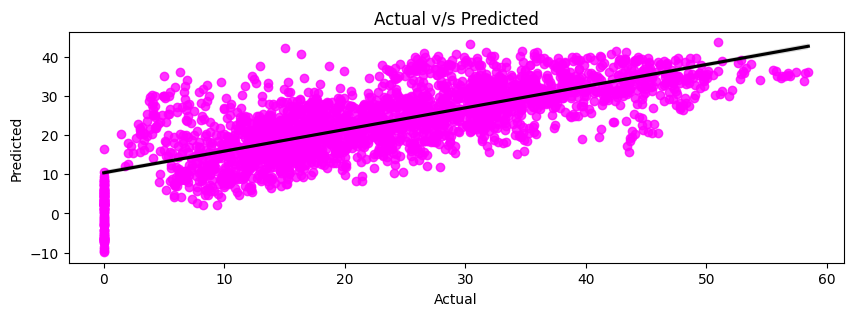

In [ ]:
# Visualization
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyper parameter tuning our original model, we can see a reduction in Mean Squared Error, Root Mean Squared Error, Mean Absolute Error. The R-squared value increases which means the model is now explaining a little more variance in the data as compared to the original model.

### ML Model - 3 - Ridge Regression

In [ ]:
# ML Model - 3 Implementation
t0 = time.time()
ridge_reg=Ridge(alpha = 0.1, max_iter = 10000)
# Fit the Algorithm
ridge_reg.fit(x_train, y_train)
# Predict on the model

Ridge(alpha=0.1, max_iter=10000)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
coef = ridge_reg.coef_
pd.DataFrame(coef, x.columns, columns=[1])

1
Hour                0.597963
temperature         0.534979
holiday            -2.430174
functioning_day    25.666951
month               0.260551
week_ends_or_days  -0.356458
log_rainfall       -2.747841
log_snowfall       -2.362114

In [ ]:
y_pred = ridge_reg.predict(x_test)
y_training_pred = ridge_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Ridge Regression", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 0.07583475112915039


In [ ]:
get_metrics(y_test, y_pred, 'Ridge regression')
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.58950004285292
The Root Mean Squared Error(RMSE) is:- 8.34203212909498
The Mean Absolute Error(MAE) is:- 6.41472185316914
The R2 Score is:- 0.5575354989352959


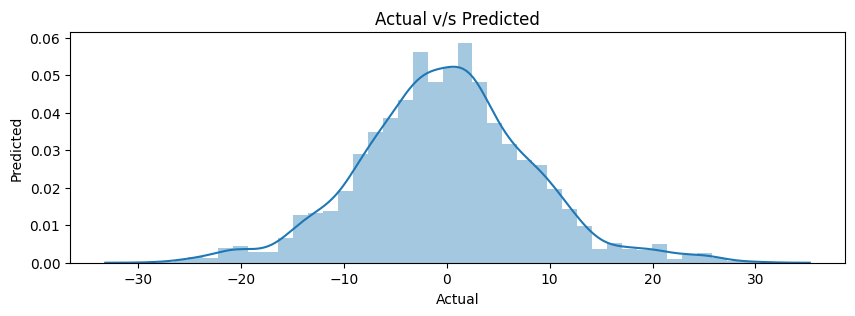

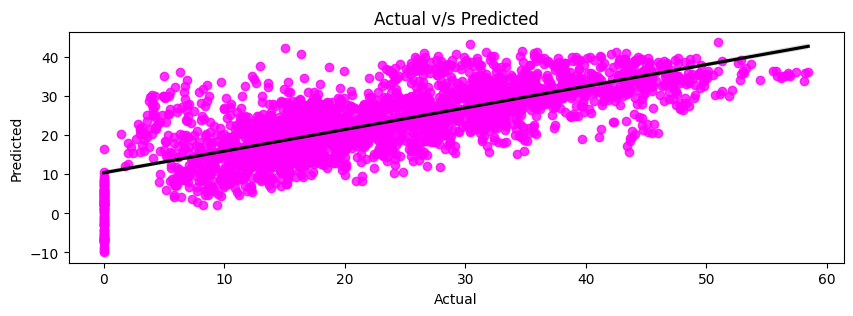

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, 'Ridge regression')
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.03911456392072
The Root Mean Squared Error(RMSE) is:- 8.308977949418372
The Mean Absolute Error(MAE) is:- 6.392459183907429
The R2 Score is:- 0.551807589487755


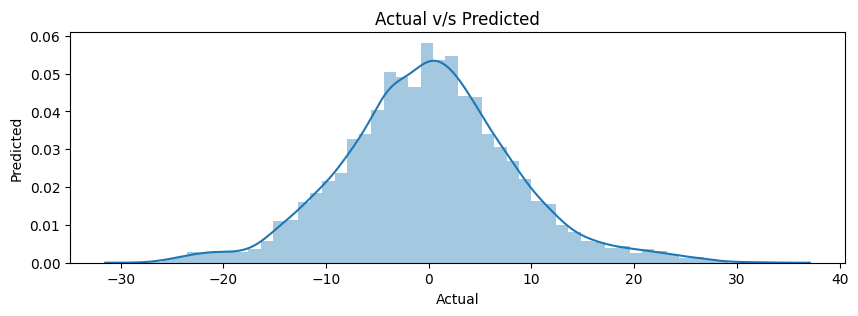

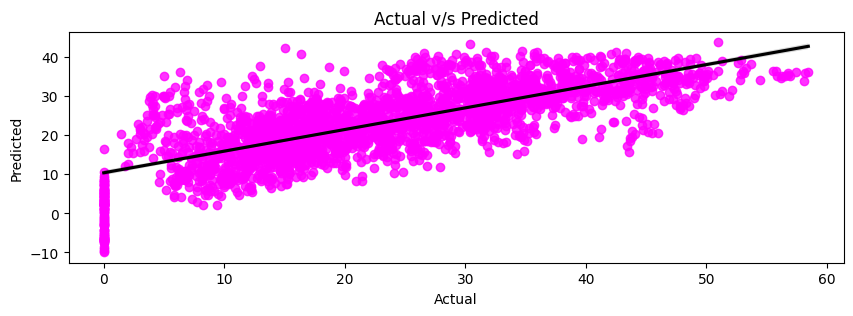

In [ ]:
# visualization
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
t0 = time.time()
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# Fit the Algorithm
ridge_cv = GridSearchCV(ridge_reg, alphas, scoring = 'neg_mean_squared_error')
# Predict on the model
ridge_cv.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(alpha=0.1, max_iter=10000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_cv.best_score_

-69.22089190552029

In [ ]:
ridge_cv.best_params_

{'alpha': 0.1}

In [ ]:
# Now using alpha = 1, we will fit ridge regression
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
y_training_pred = ridge_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Ridge Regression (GridSearchCV)", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 1.6605944633483887


In [ ]:
get_metrics(y_test, y_pred, "Ridge Regression(GridSearchCV)")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.60195246820277
The Root Mean Squared Error(RMSE) is:- 8.342778462131353
The Mean Absolute Error(MAE) is:- 6.416166758513879
The R2 Score is:- 0.5574563238274696


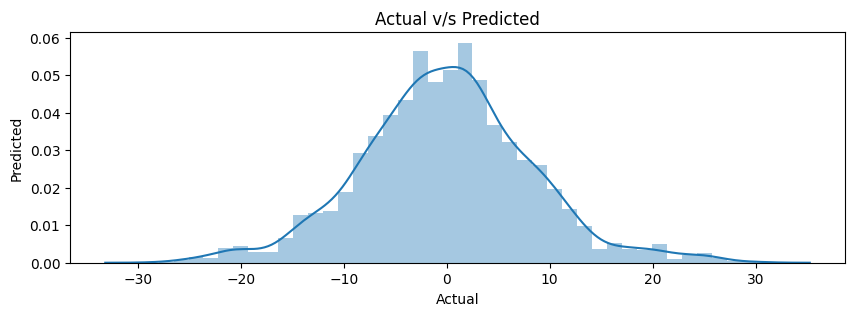

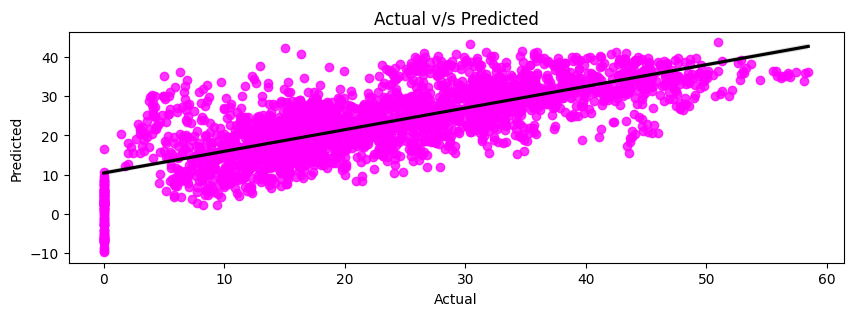

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, "Ridge Regression(GridSearchCV)")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.03970581976277
The Root Mean Squared Error(RMSE) is:- 8.309013528678527
The Mean Absolute Error(MAE) is:- 6.3926619251782615
The R2 Score is:- 0.5518037511363689


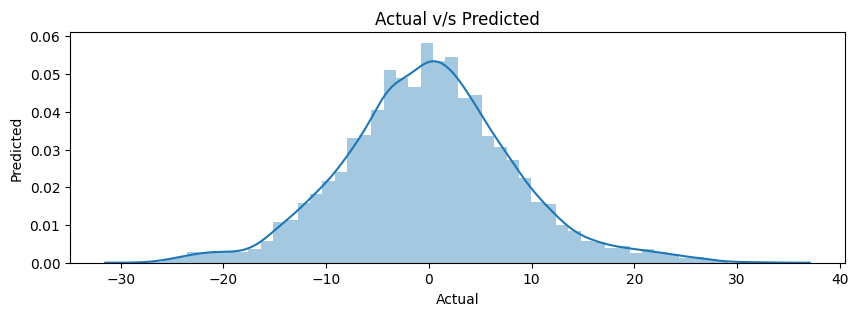

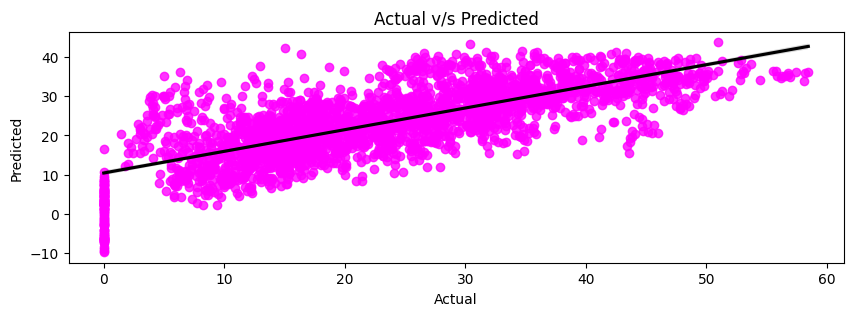

In [ ]:
# visualization
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By evaluating the metrics above, we can see that there is no improvement in the evaluation metrics as compared in the original model.

### ML Model - 4

In [ ]:
t0 = time.time()
elastic_reg = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_reg.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
print("Regression Score for training dataset:-",elastic_reg.score(x_train, y_train))
print("Regression Score for test dataset",elastic_reg.score(x_test, y_test))

Regression Score for training dataset:- 0.5488589261067691
Regression Score for test dataset 0.5512262520177815


In [ ]:
y_pred = elastic_reg.predict(x_test)
y_training_pred = elastic_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("ElasticNet Regression", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 0.0774388313293457


In [ ]:
get_metrics(y_test, y_pred, 'ElasticNet Regression')
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 70.58179962300052
The Root Mean Squared Error(RMSE) is:- 8.401297496399025
The Mean Absolute Error(MAE) is:- 6.480547475559894
The R2 Score is:- 0.5512262520177815


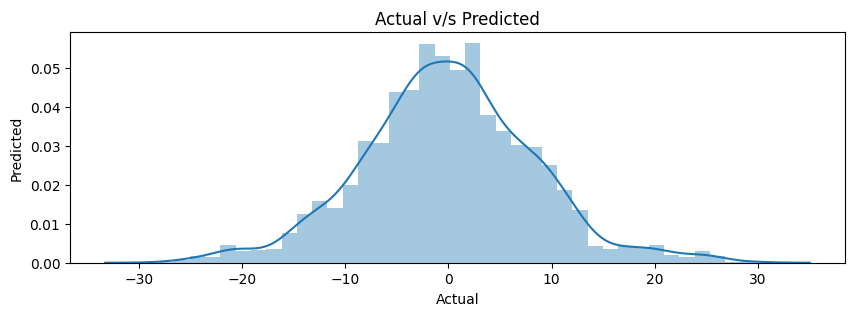

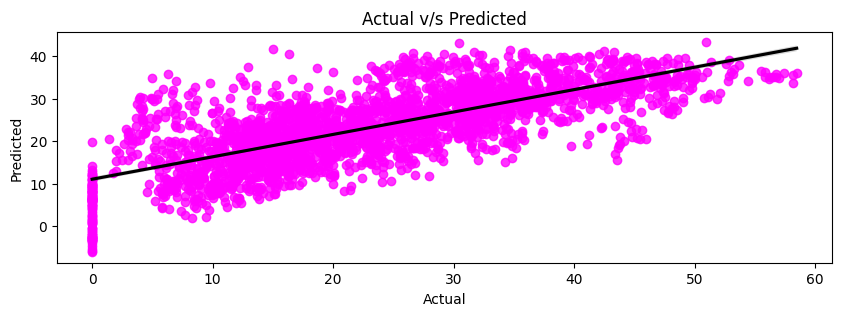

In [ ]:
# visualization
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, 'ElasticNet Regression')
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.49332374773454
The Root Mean Squared Error(RMSE) is:- 8.336265575648039
The Mean Absolute Error(MAE) is:- 6.417555589424071
The R2 Score is:- 0.5488589261067691


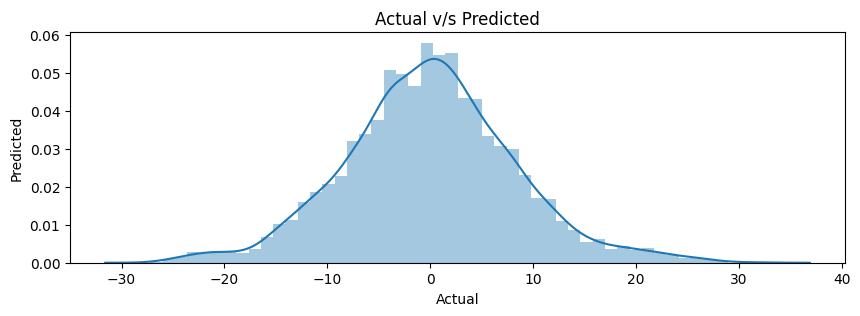

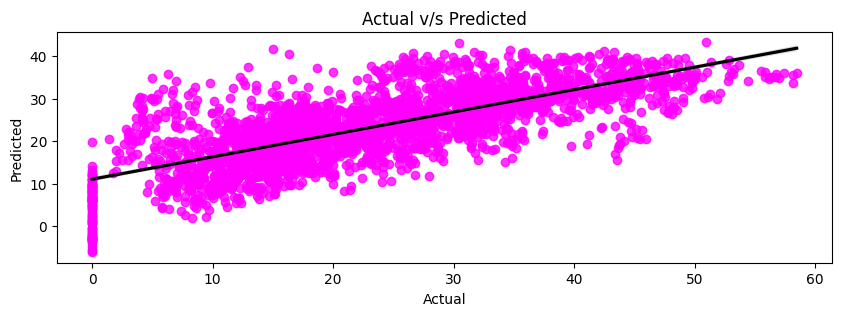

In [ ]:
# visualization
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
t0 = time.time()
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
elastic_cv = GridSearchCV(elastic_reg, alphas, scoring ='neg_mean_squared_error')

In [ ]:
elastic_cv.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(alpha=0.01),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_cv.best_params_

{'alpha': 0.0001}

In [ ]:
elastic_cv.best_score_

-69.22086344044946

In [ ]:
elastic_reg = ElasticNet(alpha = 0.0001)
elastic_reg.fit(x_train, y_train)
y_pred = elastic_reg.predict(x_test)
y_training_pred = elastic_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("ElasticNet Regreession", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 1.8504066467285156


In [ ]:
get_metrics(y_test, y_pred, "Elastic Net(GridSearchCV)")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.59270685184508
The Root Mean Squared Error(RMSE) is:- 8.342224334782966
The Mean Absolute Error(MAE) is:- 6.415088503394851
The R2 Score is:- 0.5575151093773905


In [ ]:
get_metrics(y_train, y_training_pred, "Elastic Net(GridSearchCV)")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 69.0391702615883
The Root Mean Squared Error(RMSE) is:- 8.308981301073453
The Mean Absolute Error(MAE) is:- 6.392505205986806
The R2 Score is:- 0.5518072279061783


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyper parameter tuning our original model, we can see a reduction in Mean Squared Error, Root Mean Squared Error, Mean Absolute Error. The R-squared value increases which means the model is now explaining a little more variance in the data as compared to the original model.

### ML Model - 5

In [ ]:
t0 = time.time()
rf = RandomForestRegressor(random_state = 101)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [ ]:
y_pred = rf.predict(x_test)
y_train_preds = rf.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Random Forest Regressor", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 1.7591698169708252


In [ ]:
get_metrics(y_test, y_pred,'Random Forest Regressor')
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 23.12817487846307
The Root Mean Squared Error(RMSE) is:- 4.809176112232018
The Mean Absolute Error(MAE) is:- 2.971649588484566
The R2 Score is:- 0.8529462583890571


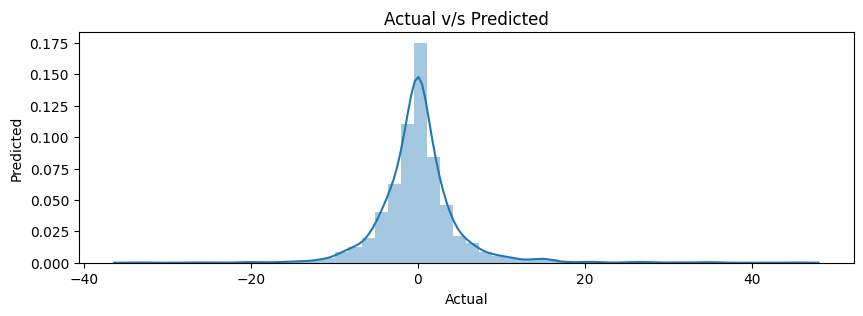

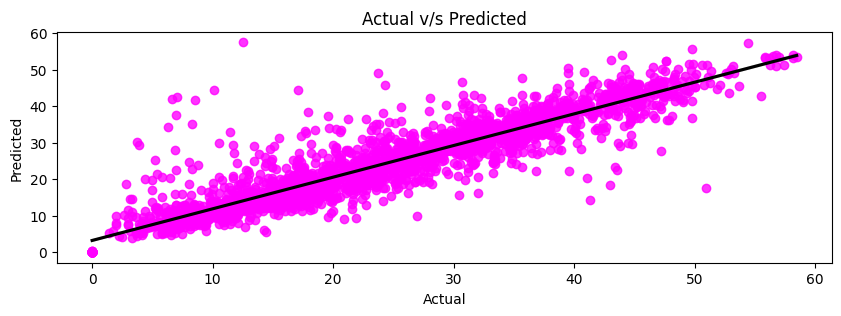

In [ ]:
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_train_preds, 'Random Forest Regressor')
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 3.6800208140951955
The Root Mean Squared Error(RMSE) is:- 1.9183380343659966
The Mean Absolute Error(MAE) is:- 1.1516857140084131
The R2 Score is:- 0.9761098123893597


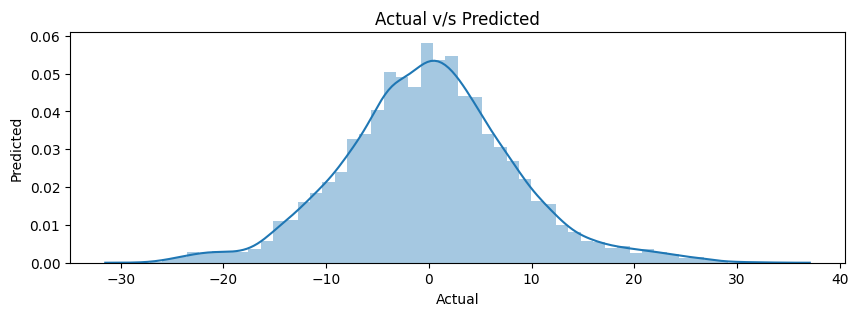

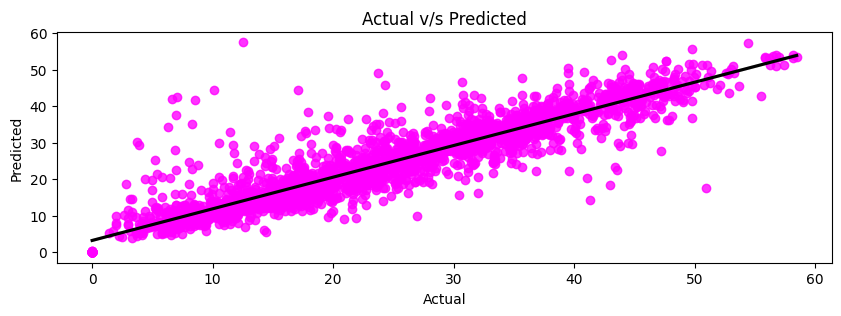

In [ ]:
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

In [ ]:
t0 = time.time()
param_grid = [
              {'n_estimators': [320],
               'max_features': [2],
               'max_depth': [35]}
]

rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_grid,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error', n_jobs = -1)
rf_grid.fit(x_train, y_train)
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best: -23.941087 using {'max_depth': 35, 'max_features': 2, 'n_estimators': 320}


In [ ]:
rf_opt=RandomForestRegressor(n_estimators = 320, max_depth = 35, max_features = 2, random_state = 101)#, min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
# Fit the Algorithm
rf_opt.fit(x_train, y_train)
# Predict on the model
y_preds = rf_opt.predict(x_test)
y_training_preds = rf_opt.predict(x_train)
time_in_sec = (time.time() - t0)+180

In [ ]:
get_time("Random Forest Regressor (GridSearchCV) ", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 194.72744154930115


In [ ]:
get_metrics(y_train, y_training_preds, "Random Forest Regressor CV")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 3.2858859952805397
The Root Mean Squared Error(RMSE) is:- 1.8127012978647474
The Mean Absolute Error(MAE) is:- 1.1146428902372603
The R2 Score is:- 0.9786684812776721


In [ ]:
get_metrics(y_test, y_preds, "Random Forest Regressor CV")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 20.68272244347012
The Root Mean Squared Error(RMSE) is:- 4.54782612282727
The Mean Absolute Error(MAE) is:- 2.8917621379433447
The R2 Score is:- 0.8684949531039253


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyper parameter tuning our original model, we can see a reduction in Mean Squared Error, Root Mean Squared Error, Mean Absolute Error. The R-squared value increases which means the model is now explaining a little more variance in the data as compared to the original model.

##### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Text(0.5, 0, 'Relative Importance')

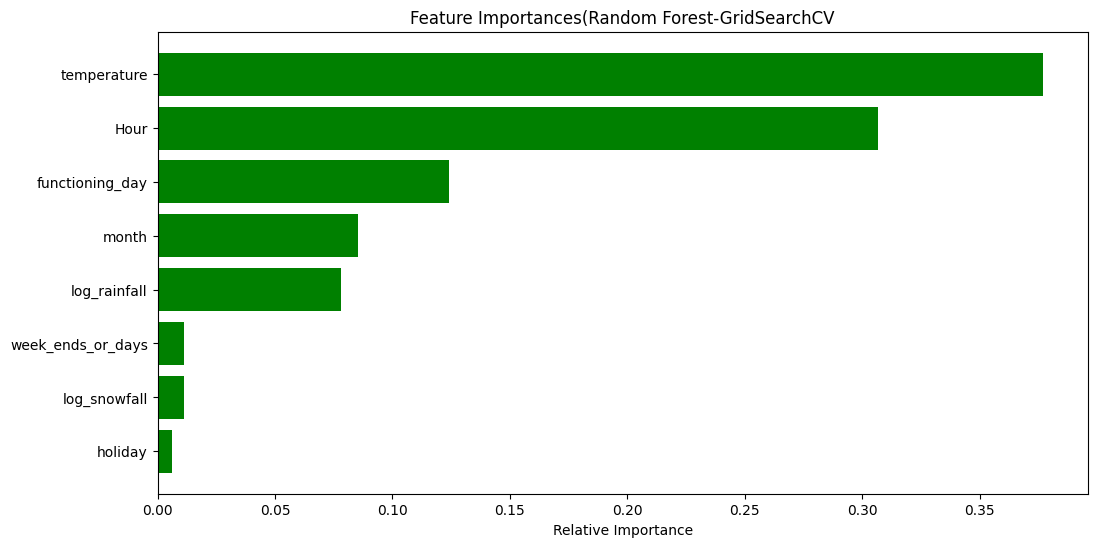

In [ ]:
importances = rf_opt.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')


### ML Model - 6

In [ ]:
t0 = time.time()
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr_reg.predict(x_test)
y_training_pred = gbr_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("Gradient Boosting Regressor", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 0.6405754089355469


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
get_metrics(y_test, y_pred, "Gradient Boosting Regressor")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 28.04999945008115
The Root Mean Squared Error(RMSE) is:- 5.29622501883003
The Mean Absolute Error(MAE) is:- 3.6504881923380075
The R2 Score is:- 0.8216522750716321


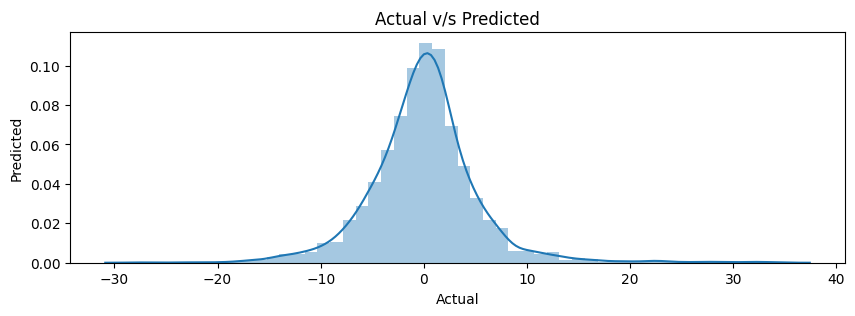

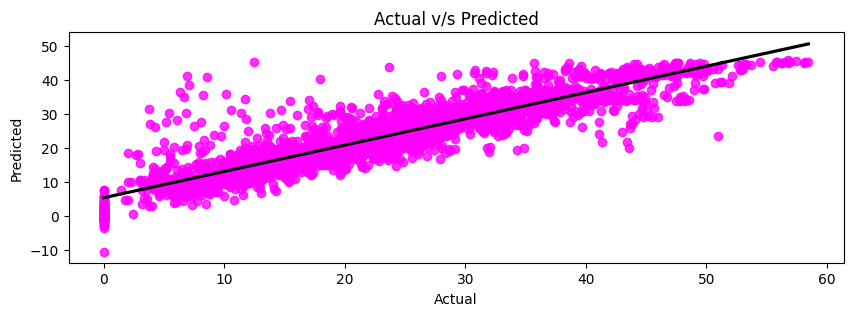

In [ ]:
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, "Gradient Boosting Regressor")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 26.62156947545637
The Root Mean Squared Error(RMSE) is:- 5.159609430514713
The Mean Absolute Error(MAE) is:- 3.5342163940424136
The R2 Score is:- 0.827176442366204


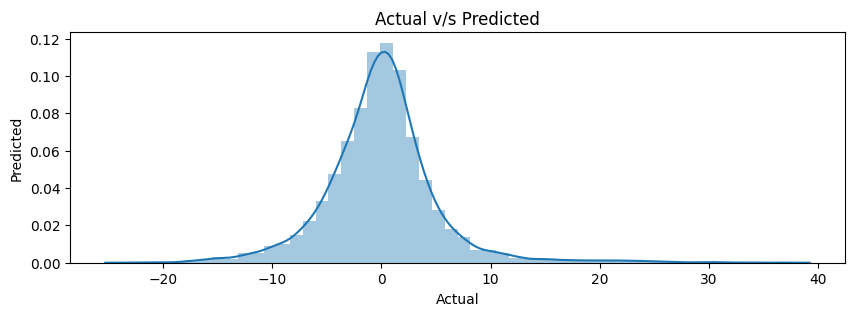

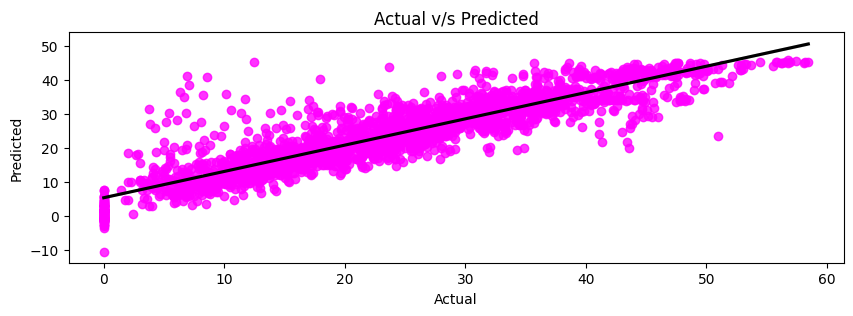

In [ ]:
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)



---



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
t0 = time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.06],
              'n_estimators': [195],
              'max_depth': [6]}

gbr_cv = GridSearchCV(estimator=gbr_reg,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gbr_cv.fit(x_train, y_train)
gbr_cv.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 195}

after messing around with the group of param dicts for various values

In [ ]:
gbr_cv.best_score_

0.8474264155059187

In [ ]:
gbr_reg = GradientBoostingRegressor(learning_rate = 0.06, n_estimators = 195, max_depth = 6)

In [ ]:
gbr_reg.fit(x_train, y_train)
y_pred = gbr_reg.predict(x_test)
y_training_pred = gbr_reg.predict(x_train)
time_in_sec = time.time() - t0

In [ ]:
get_time("GradientBoostingRegressor(GridSearchCV)", time_in_sec)
times = times.append(time_df, ignore_index = True)

Training time in seconds:- 7.011843204498291


In [ ]:
get_metrics(y_test, y_pred, "GradientBoostingRegressor(GridSearchCV)")
test_df = test_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 21.68454489751331
The Root Mean Squared Error(RMSE) is:- 4.656666715314003
The Mean Absolute Error(MAE) is:- 2.9625843270902923
The R2 Score is:- 0.8621251577754537


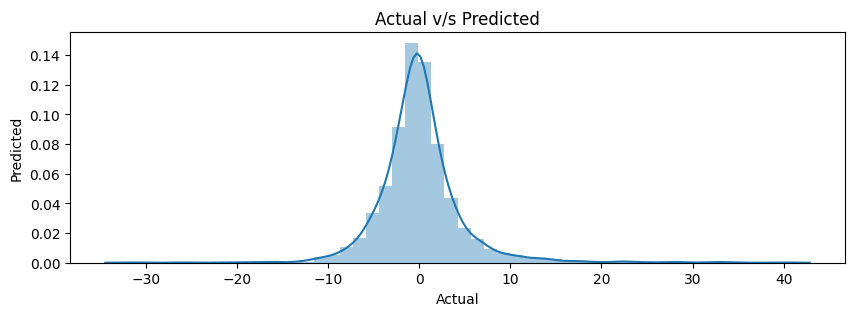

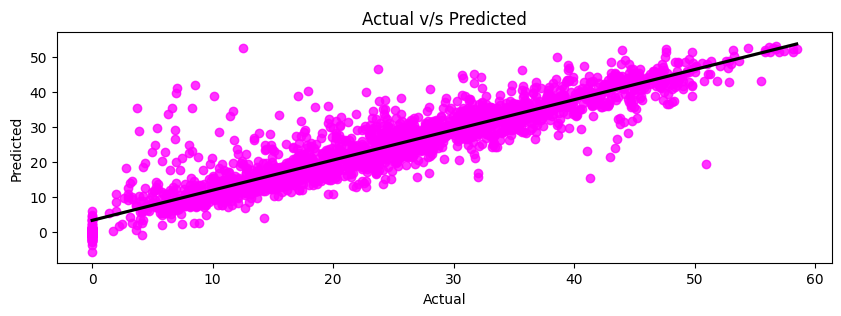

In [ ]:
plot_distplot(y_pred, y_test)
plot_scatter(y_pred, y_test)

In [ ]:
get_metrics(y_train, y_training_pred, "GradientBoostingRegressor(GridSearchCV)")
train_df = train_df.append(results_df, ignore_index = True)

The Mean Squared Error(MSE) is:- 14.185894449892107
The Root Mean Squared Error(RMSE) is:- 3.7664166590928447
The Mean Absolute Error(MAE) is:- 2.351024046783513
The R2 Score is:- 0.907907129618779


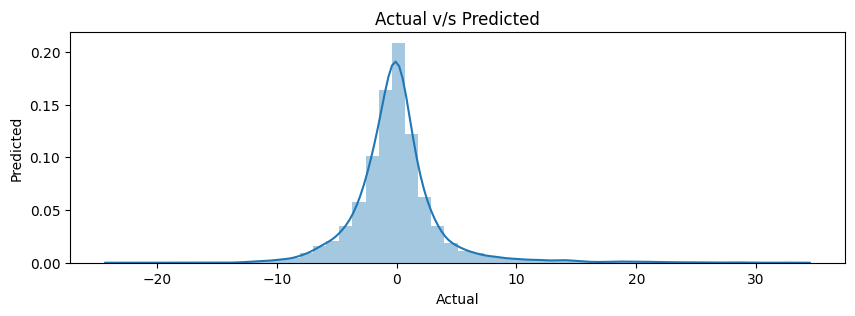

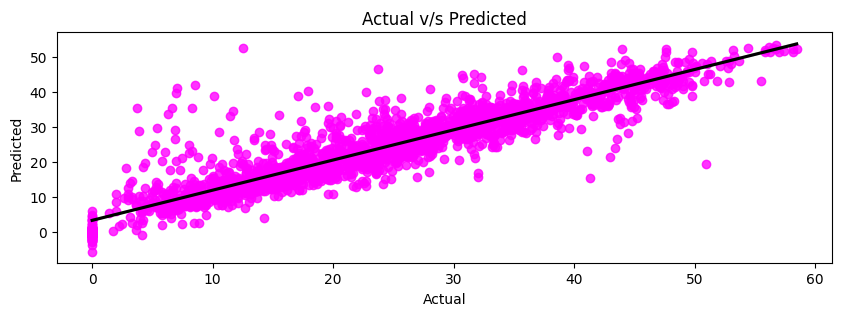

In [ ]:
plot_distplot(y_training_pred, y_train)
plot_scatter(y_training_pred, y_train)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV(Cross Validation). GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters. In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyper parameter tuning our original model, we can see a reduction in Mean Squared Error, Root Mean Squared Error, Mean Absolute Error. The R-squared value increases which means the model is now explaining a little more variance in the data as compared to the original model.

##### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Text(0.5, 0, 'Relative Importance')

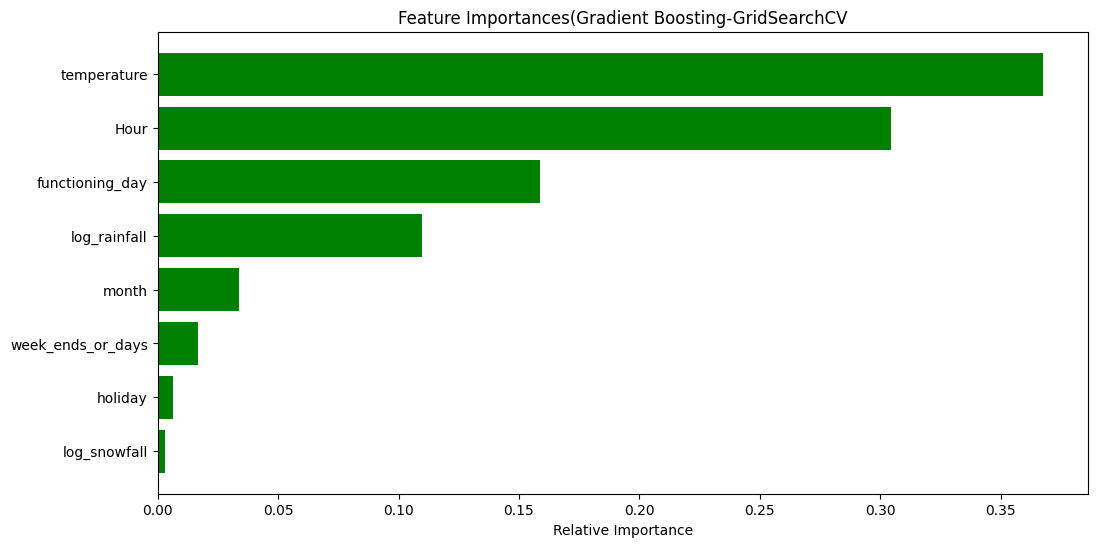

In [ ]:
importances = gbr_reg.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')

# **Conclusion**

In [ ]:
final_results = pd.concat([train_df, test_df],keys = ['Training Set', 'Test Set'])
final_results

Name     MSE   RMSE  \
Training Set 0                         Linear Regression  69.039  8.309   
             1                          Lasso Regression  69.910  8.361   
             2            Lasso Regression(GridSearchCV)  69.039  8.309   
             3                          Ridge regression  69.039  8.309   
             4            Ridge Regression(GridSearchCV)  69.040  8.309   
             5                     ElasticNet Regression  69.493  8.336   
             6                 Elastic Net(GridSearchCV)  69.039  8.309   
             7                   Random Forest Regressor   3.680  1.918   
             8                Random Forest Regressor CV   3.286  1.813   
             9               Gradient Boosting Regressor  26.622  5.160   
             10  GradientBoostingRegressor(GridSearchCV)  14.186  3.766   
Test Set     0                         Linear Regression  69.588  8.342   
             1                          Lasso Regression  71.477  8.454   
             2            Lasso Regression(GridSearchCV)  69.597  8.342   
             3                          Ridge regression  69.590  8.342   
             4            Ridge Regression(GridSearchCV)  69.602  8.343   
             5                     ElasticNet Regression  70.582  8.401   
             6                 Elastic Net(GridSearchCV)  69.593  8.342   
             7                   Random Forest Regressor  23.128  4.809   
             8                Random Forest Regressor CV  20.683  4.548   
             9               Gradient Boosting Regressor  28.050  5.296   
             10  GradientBoostingRegressor(GridSearchCV)  21.685  4.657   

                   MAE  R2 Score  
Training Set 0   6.392   0.55181  
             1   6.452   0.54615  
             2   6.393   0.55181  
             3   6.392   0.55181  
             4   6.393   0.55180  
             5   6.418   0.54886  
             6   6.393   0.55181  
             7   1.152   0.97611  
             8   1.115   0.97867  
             9   3.534   0.82718  
             10  2.351   0.90791  
Test Set     0   6.415   0.55754  
             1   6.518   0.54553  
             2   6.415   0.55749  
             3   6.415   0.55754  
             4   6.416   0.55746  
             5   6.481   0.55123  
             6   6.415   0.55752  
             7   2.972   0.85295  
             8   2.892   0.86849  
             9   3.650   0.82165  
             10  2.963   0.86213

We can see that we got the best test results by doing hyperparameter tuning on Random Forest Regressor because it has the lowest Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and the highest R-squared value.

In [ ]:
# Fit the Algorithm
rf_opt.fit(x_train, y_train)
# Predict on the model
y_preds = rf_opt.predict(x_test)

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***